In [1]:
#Speed Up autocomplete
%config Completer.use_jedi = False
#can use ipython locate profile to find your current profile directory, and edit the ipython_config.py to add c.IPCompleter.use_jedi = False

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
#set plot parameters
insurers = ['INSURER1_PREMIUM', 'INSURER2_PREMIUM', 'INSURER3_PREMIUM', 'INSURER4_PREMIUM']
# minage = 15
# maxage = 100
# age_bracket_size = 5

### Let's explore the data

In [4]:
#load the data
data = pd.read_csv('data.csv')

#Transpose the DF to make the columns easier to see
data.head(8).T

,0,1,2,3,4,5,6,7
YEARLYKM,15,20,5,15,15,20,15,15
LICCANCNT,0,0,0,0,0,0,0,0
OWNERAGE,68,31,59,59,67,62,54,30
MVINSURER,AAMI,NRMA,GIO,AAMI,GIO,GIO,AAMI,GIO
REGUSE,PRIV,PRIV,PRIV,PRIV,PRIV,PRIV,PRIV,PRIV
MAKE,TOYOTA,LAND ROVER,BMW,HYUNDAI,SUBARU,JEEP,TOYOTA,AUDI
MVINSYEARS,4,0,1,4,4,0,1,0
MANUFYEAR,2008,2015,2008,2000,2003,2013,2008,2014
YDAGE,68,31,59,33,67,62,54,30
MODEL,COROLLA,DISCOVERY,120I,ELANTRA,LIBERTY,GRAND CHEROKEE,COROLLA,A4


### Observe: 

- Mix of numeric and categorical values 
- MANUFYEAR & VEHAGE appear to be the same thing written different ways

***

In [5]:
#View the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59504 entries, 0 to 59503
Data columns (total 26 columns):
YEARLYKM            59504 non-null int64
LICCANCNT           59504 non-null int64
OWNERAGE            59504 non-null int64
MVINSURER           59504 non-null object
REGUSE              59504 non-null object
MAKE                59504 non-null object
MVINSYEARS          59504 non-null int64
MANUFYEAR           59504 non-null int64
YDAGE               59504 non-null int64
MODEL               59504 non-null object
ATFAULTACCDS        59504 non-null int64
NRMAASST            59504 non-null int64
NOYRLICOBT          59504 non-null int64
MVINSTYPE           59504 non-null object
DEMERITPTS          59504 non-null int64
NCBPCT              59504 non-null int64
COMREGVEH           59504 non-null object
YDGENDER            59504 non-null object
ATFAULT5YRS         59504 non-null object
SHAPE               59504 non-null object
VEHAGE              59504 non-null int64
INSURER1_PREMIUM    5

### Observe: 

- No missing values
- Target columns are the four INSURERX_PREMIUM columns

***

In [6]:
#Data Dictionary 
ddict = pd.read_csv('data-dictionary.csv')
ddict

,FIELD,DESCRIPTION
0,YEARLYKM,Average Annual Kilometres
1,LICCANCNT,Conviction or Suspension in last 5 years
2,OWNERAGE,Age of Owner
3,MVINSURER,"Other Insurance Provider (If MVINSTYPE = N, th..."
4,REGUSE,Registration Use Type
5,MAKE,Vehicle Manufacturer
6,MVINSYEARS,Years Insured with Other Insurance
7,MANUFYEAR,Year of Manufacture
8,YDAGE Age,Youngest Driver
9,MODEL,Vehicle Model


In [7]:
#Look at the range of values for each feature
for col in data:
    print(col, np.sort(data[col].unique()))

YEARLYKM [ 5 10 15 20 99]
LICCANCNT [0 1]
OWNERAGE [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 90 91 92 93 94 95 96 98 99]
MVINSURER ['AAMI' 'ALLI' 'GIO' 'NONE' 'NRMA' 'OTH' 'QBE']
REGUSE ['BUSG' 'PRIV']
MAKE ['ABARTH' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'CHERY'
 'CHRYSLER' 'CITROEN' 'DAEWOO' 'DAIHATSU' 'DODGE' 'FERRARI' 'FIAT' 'FORD'
 'GREAT WALL MOTORS' 'HAVAL' 'HOLDEN' 'HONDA' 'HSV' 'HUMMER' 'HYUNDAI'
 'INFINITI' 'ISUZU' 'JAGUAR' 'JEEP' 'KIA' 'LAND ROVER' 'LDV' 'LEXUS'
 'LOTUS' 'MASERATI' 'MAZDA' 'MCLAREN' 'MERCEDES AMG' 'MERCEDES BENZ'
 'MERCEDES-AMG' 'MERCEDES-BENZ' 'MG' 'MINI' 'MITSUBISHI' 'NISSAN' 'OPEL'
 'PEUGEOT' 'PORSCHE' 'PROTON' 'RANGE ROVER' 'RENAULT' 'SAAB' 'SKODA'
 'SMART' 'SSANGYONG' 'SUBARU' 'SUZUKI' 'TESLA' 'TOYOTA' 'VOLKSWAGEN'
 'VOLVO']
MVINSYEARS [0 1 2 3 4]
MANUFYEAR [1999 

In [8]:
#Look at the range of values for each feature
for col in data:
    print(col, len(data[col].unique()))

YEARLYKM 5
LICCANCNT 2
OWNERAGE 82
MVINSURER 7
REGUSE 2
MAKE 58
MVINSYEARS 5
MANUFYEAR 20
YDAGE 63
MODEL 631
ATFAULTACCDS 2
NRMAASST 7
NOYRLICOBT 7
MVINSTYPE 3
DEMERITPTS 15
NCBPCT 2
COMREGVEH 2
YDGENDER 3
ATFAULT5YRS 2
SHAPE 4
VEHAGE 20
INSURER1_PREMIUM 41
INSURER2_PREMIUM 585
INSURER3_PREMIUM 6501
INSURER4_PREMIUM 22
COMMENCEDATE 2


### Observe: 

- YEARLYKM: Bracketed in 5000 km bins with "99" bin for "all above X" 
- MAKE & MODEL are highly-cardinal classes
- COMMENCEDATE: Experiments run over 2 time preiods 2 months apart
- SHAPE: codes here https://www.rms.nsw.gov.au/documents/business-industry/examiners/vehicle-shape-codes-guide.pdf
- INSURERX_PREMIUM: Some are binned prices, some are effectively continuous

***

In [9]:
#Observe Numeric Column distributions
data.describe().T

,count,mean,std,min,25%,50%,75%,max
YEARLYKM,59504.0,14.793022,8.875072,5.000000,15.000000,15.000000,15.000000,99.000000
LICCANCNT,59504.0,0.004302,0.065451,0.000000,0.000000,0.000000,0.000000,1.000000
OWNERAGE,59504.0,49.269293,14.029483,17.000000,38.000000,49.000000,59.000000,99.000000
MVINSYEARS,59504.0,1.918829,1.697122,0.000000,0.000000,2.000000,4.000000,4.000000
MANUFYEAR,59504.0,2009.365522,4.771976,1999.000000,2006.000000,2010.000000,2013.000000,2018.000000
YDAGE,59504.0,47.371504,13.598220,17.000000,37.000000,46.000000,58.000000,79.000000
ATFAULTACCDS,59504.0,0.020167,0.140572,0.000000,0.000000,0.000000,0.000000,1.000000
NRMAASST,59504.0,1.971397,3.014982,-1.000000,-1.000000,2.000000,5.000000,25.000000
NOYRLICOBT,59504.0,5.287880,1.834243,0.000000,6.000000,6.000000,6.000000,6.000000
DEMERITPTS,59504.0,0.367101,1.427032,0.000000,0.000000,0.000000,0.000000,14.000000


### Observe: 

- Relative Min & Max of premiums for each insurer

***

### Quick & Dirty plot to get a feel for distributions of the numerical columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1617ca90>,
      dtype=object)

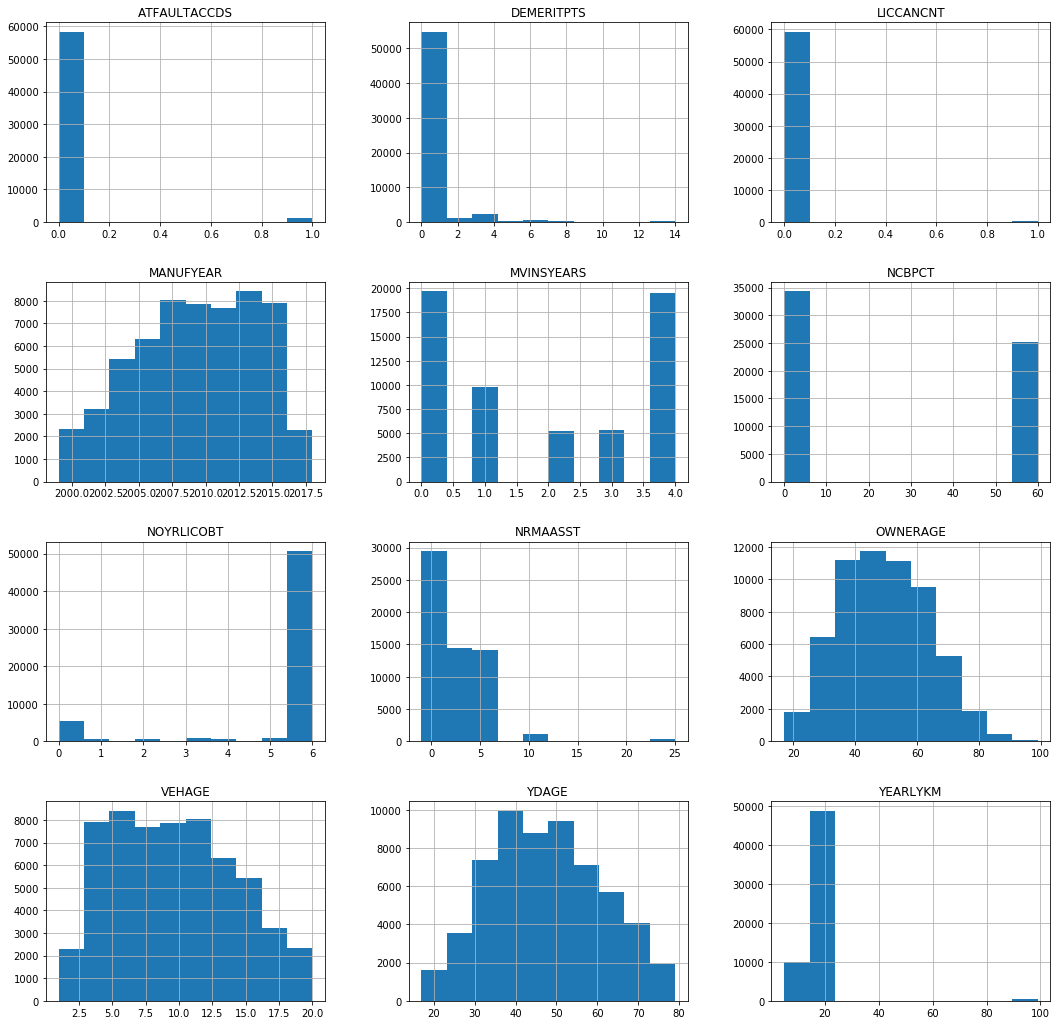

In [10]:
data[data.describe().columns[:-4]].hist(figsize=(18,18))

### Observe: 

- The distributions of the experiments appears to reflect the distribution each feature would display in the real world

***

### Quick & Dirty plot to get a feel for distributions of the target columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17ee30f0>,
      dtype=object)

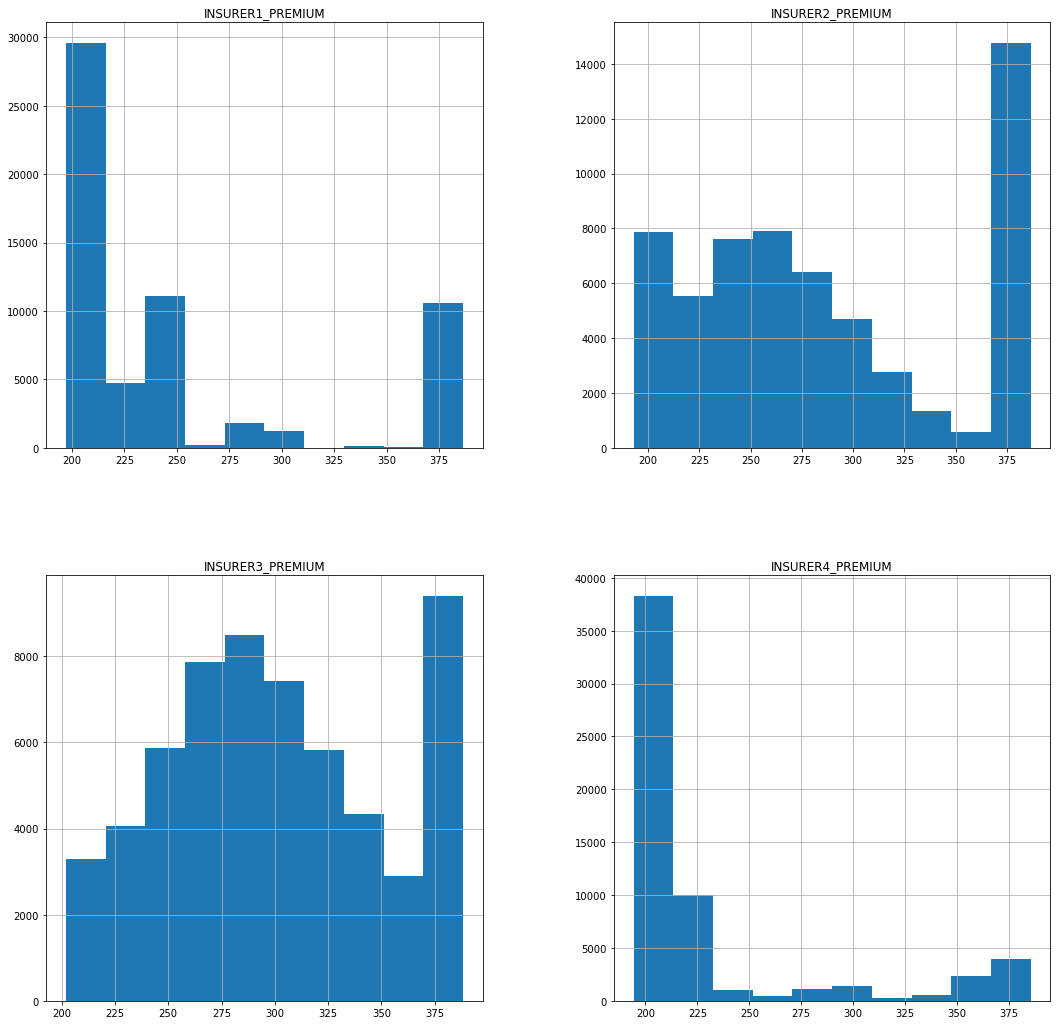

In [11]:
data[data.describe().columns[-4:]].hist(figsize=(18,18))

### Observe: 

- INSURERs 1 & 4 appear to be lower in price overall
- It appears the prices above $375 may have been "rolled up". Will this skew the models?

***

In [13]:
cols = list(data.columns)
target_cols = cols[:-4]
target_cols

['YEARLYKM',
 'LICCANCNT',
 'OWNERAGE',
 'MVINSURER',
 'REGUSE',
 'MAKE',
 'MVINSYEARS',
 'MANUFYEAR',
 'YDAGE',
 'MODEL',
 'ATFAULTACCDS',
 'NRMAASST',
 'NOYRLICOBT',
 'MVINSTYPE',
 'DEMERITPTS',
 'NCBPCT',
 'COMREGVEH',
 'YDGENDER',
 'ATFAULT5YRS',
 'SHAPE',
 'VEHAGE',
 'INSURER1_PREMIUM']

# Numeric Vs Categorical Data 

In [23]:
#get all columns
cols = list(data.columns)

#get only the numeric columns
numeric_cols = list(data.describe().columns)

#get only the non-numeric / categorical columns
categorical_cols = list(set(cols) - set(numeric_cols))

#split out the target variables
target_cols = numeric_cols[-4:]
numeric_cols = numeric_cols[:-4]

print("Numeric Columns\n")
print(numeric_cols)
print("\nNon-Numeric Columns\n")
print(categorical_cols)
print("\nTarget Columns\n")
print(target_cols)

Numeric Columns

['YEARLYKM', 'LICCANCNT', 'OWNERAGE', 'MVINSYEARS', 'MANUFYEAR', 'YDAGE', 'ATFAULTACCDS', 'NRMAASST', 'NOYRLICOBT', 'DEMERITPTS', 'NCBPCT', 'VEHAGE']

Non-Numeric Columns

['REGUSE', 'MVINSTYPE', 'MODEL', 'MVINSURER', 'SHAPE', 'COMMENCEDATE', 'ATFAULT5YRS', 'COMREGVEH', 'YDGENDER', 'MAKE']

Target Columns

['INSURER1_PREMIUM', 'INSURER2_PREMIUM', 'INSURER3_PREMIUM', 'INSURER4_PREMIUM']


In [25]:
#Take numeric columns (excluding the target vairables / premiums)
numeric_column_data = data[numeric_cols]

numeric_column_data

,YEARLYKM,LICCANCNT,OWNERAGE,MVINSYEARS,MANUFYEAR,YDAGE,ATFAULTACCDS,NRMAASST,NOYRLICOBT,DEMERITPTS,NCBPCT,VEHAGE
0,15,0,68,4,2008,68,0,5,6,0,60,11
1,20,0,31,0,2015,31,0,-1,6,2,0,4
2,5,0,59,1,2008,59,0,1,6,7,0,11
3,15,0,59,4,2000,33,0,5,0,0,60,19
4,15,0,67,4,2003,67,0,3,6,0,60,16
...,...,...,...,...,...,...,...,...,...,...,...,...
59499,15,0,56,3,2012,56,0,3,6,0,60,7
59500,15,0,70,4,2015,70,0,5,6,0,60,4
59501,10,0,70,0,2017,70,0,-1,6,4,0,2
59502,15,0,39,0,2017,39,0,-1,6,0,60,2


## Data about the Vehicle

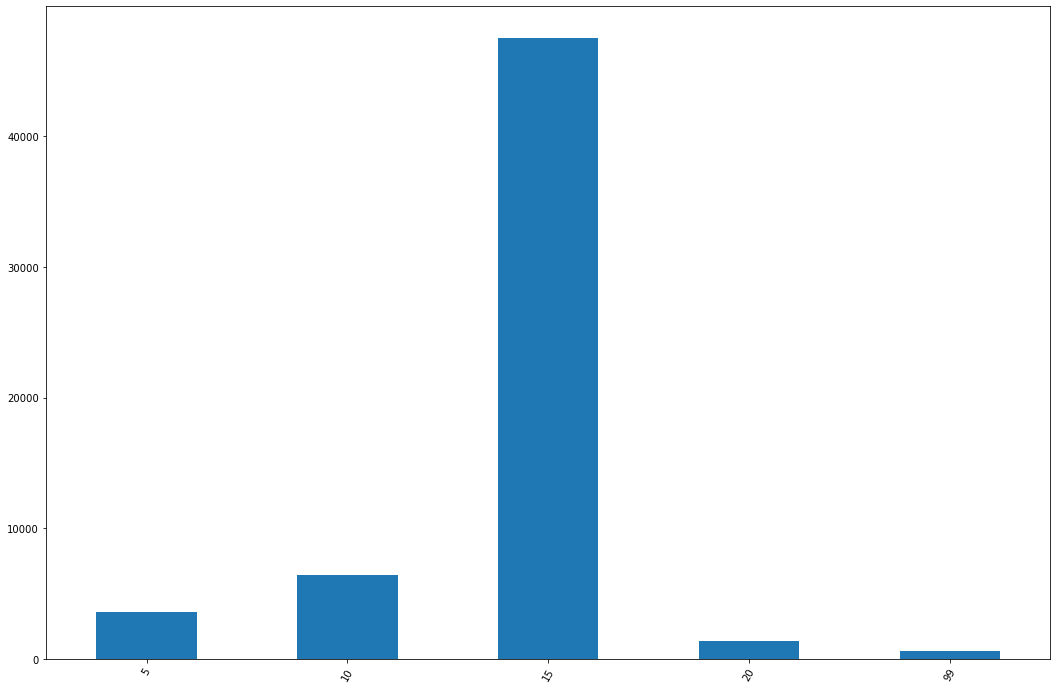

In [26]:
col_name = 'YEARLYKM'

#print(numeric_column_data[col_name].value_counts())

numeric_column_data[col_name].value_counts().sort_index().plot(kind='bar', figsize=(18,12), rot=60)
     
plt.show()

In [36]:
numeric_column_data[col_name].value_counts() / numeric_column_data[col_name].value_counts().sum()

15    0.799543
10    0.107623
5     0.060735
20    0.022251
99    0.009848
Name: YEARLYKM, dtype: float64

### Observe: 

- Yearly KM: The distribution of the experiments is 80% weighted to 15K kms. Is this skewing results? Or is it in line with a real world distribution?
- Yearly KM: "99" appears to be an outlier or a "catch-all" for 25K+

***

In [49]:
#Function to plot premuims for each insurer for each datapoint
def plot_df(source_df, col_name, low_val, high_val, bracket_size, insurers):
    #show the range being plotted
    print(col_name, np.sort(source_df[col_name].unique()))
    
    plot_df = pd.DataFrame(columns=insurers)

    for i in range(low_val, high_val + 1, bracket_size):
        row = []
        bin = str(i) + ' - ' + str(i + bracket_size)

        for ins in insurers:
            row.append(source_df[(source_df[col_name] >= i) & (source_df[col_name] <= (i + bracket_size))][ins].mean())

        plot_df.loc[bin] = row 

    #plot thje figure    
    return plot_df

In [47]:
def plot_count_df(source_df, low_val, high_val, bracket_size, insurers):
    
    plot_df = pd.DataFrame(columns=insurers)

    for i in range(low_val, high_val + 1, bracket_size):
        row = []
        bin = str(i) + ' - ' + str(i + bracket_size)

        for ins in insurers:
            row.append(source_df[(source_df[ins] >= i) & (source_df[ins] <= (i + bracket_size))].shape[0])

        plot_df.loc[bin] = row 

    #plot thje figure    
    return plot_df

YEARLYKM [ 5 10 15 20 99]


Text(0, 0.5, 'Average Premium')

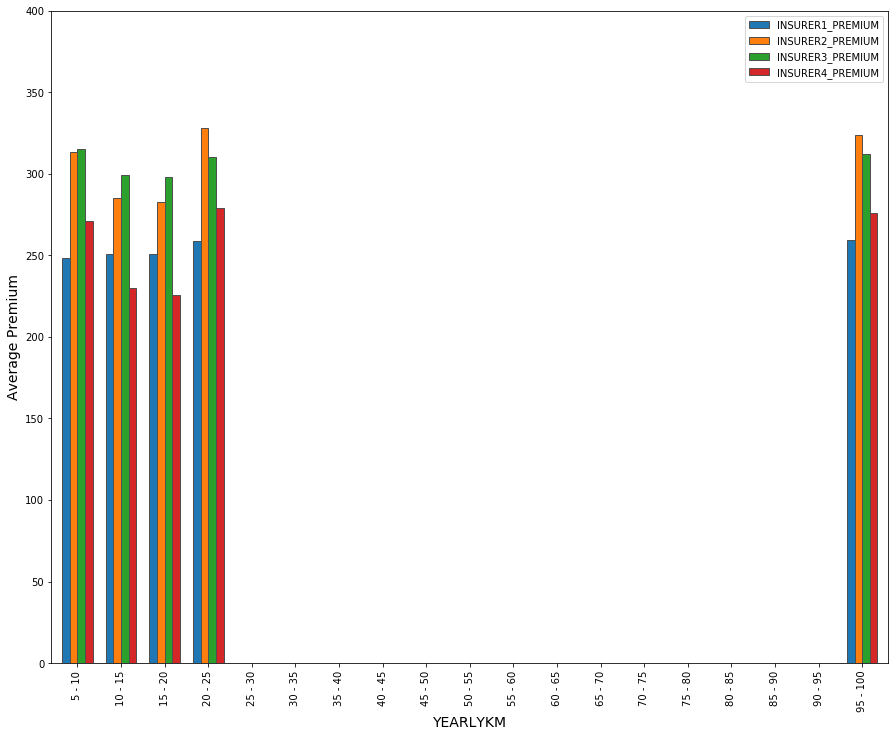

In [57]:
#Plot premiums by KM annual driven
source_df = data.copy()
low_val = data[col_name].min()
high_val = data[col_name].max()
bracket_size = 5

plot = plot_df(source_df, col_name, low_val, high_val, bracket_size, insurers)

ax =  plot.plot.bar(figsize=(15,12), width=.7, edgecolor='#505050')
ax.set_ylim(0,400)
ax.set_xlabel("YEARLYKM", fontsize=14)
ax.set_ylabel("Average Premium", fontsize=14)

### ^^^ Observe ^^^

- Insurer 1 (Suncorp) premium increases linearly with distance
- Others have a V-shaped distribution (on LHS)

0    19668
4    19500
1     9798
3     5304
2     5234
Name: MVINSYEARS, dtype: int64


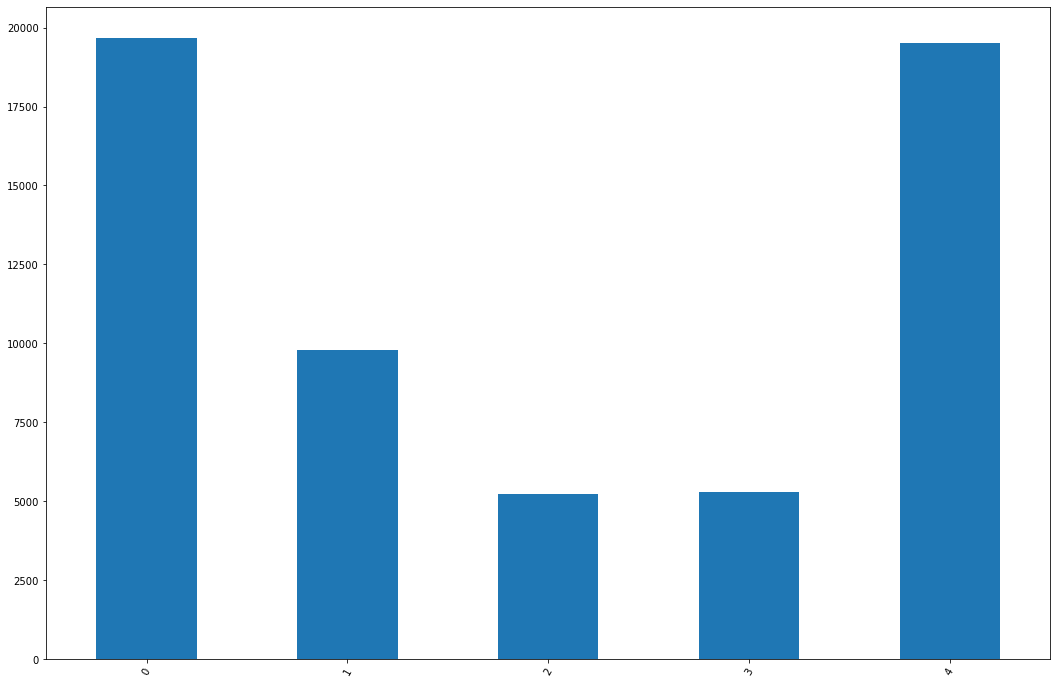

In [105]:
# Years Insured with Other Insurance
col_name = 'MVINSYEARS'

print(numeric_column_data[col_name].value_counts())

numeric_column_data[col_name].value_counts().sort_index().plot(kind='bar', figsize=(18,12), rot=60)
     
plt.show()

### ^^^ Observe ^^^

- Most customers are either loyal (4+ years) or churning (0 years)

MVINSYEARS [0 1 2 3 4]


Text(0, 0.5, 'Average Premium')

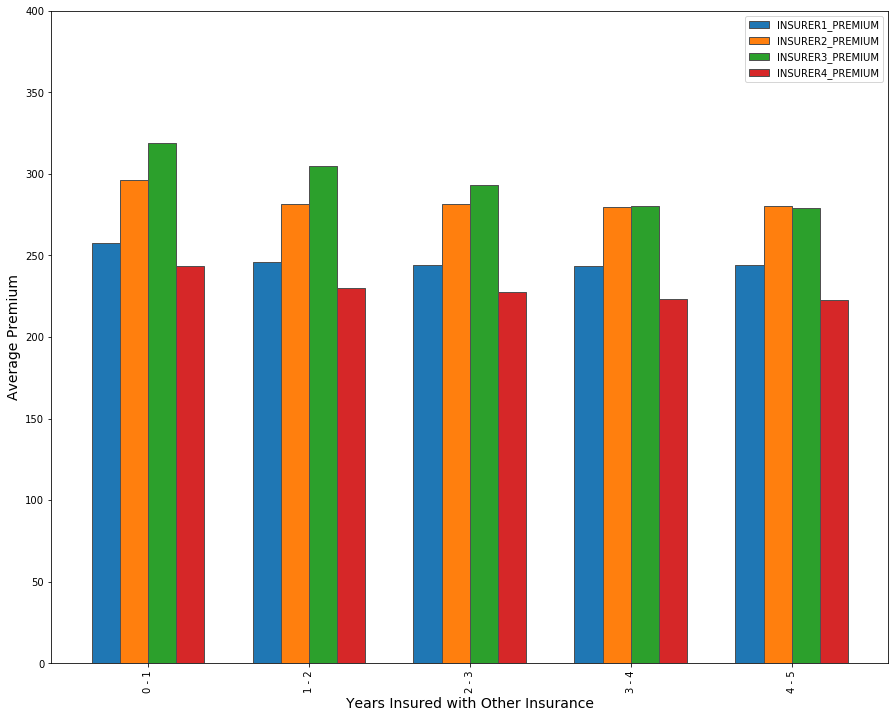

In [99]:
#Plot premiums by Years Insured with Other Insurance
source_df = data.copy()
low_val = data[col_name].min()
high_val = data[col_name].max()
bracket_size = 1

plot = plot_df(source_df, col_name, low_val, high_val, bracket_size, insurers)

ax =  plot.plot.bar(figsize=(15,12), width=.7, edgecolor='#505050')
ax.set_ylim(0,400)
ax.set_xlabel("Years Insured with Other Insurance", fontsize=14)
ax.set_ylabel("Average Premium", fontsize=14)

### ^^^ Observe ^^^

- This factor barely impacts price

2014    4360
2010    4352
2015    4302
2013    4056
2007    4032
2008    4002
2012    3976
2011    3702
2016    3622
2009    3528
2006    3266
2005    3050
2004    2896
2003    2530
2017    1900
2002    1730
2001    1494
2000    1340
1999     988
2018     378
Name: MANUFYEAR, dtype: int64


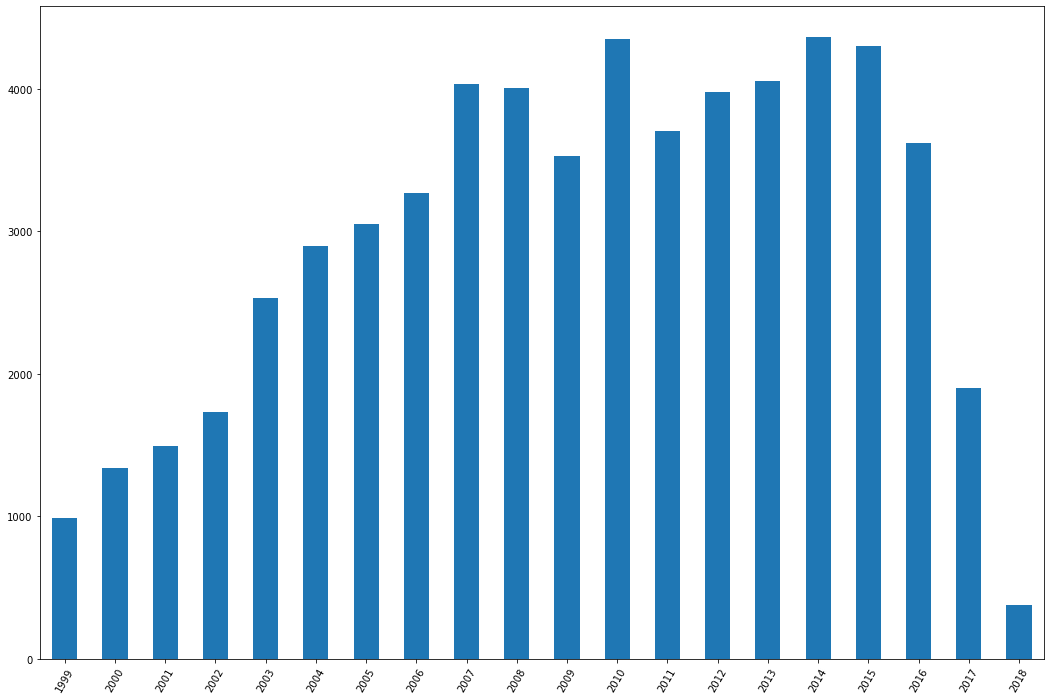

In [106]:
# Vehicle Year of Manufacture
col_name = 'MANUFYEAR'

print(numeric_column_data[col_name].value_counts())

numeric_column_data[col_name].value_counts().sort_index().plot(kind='bar', figsize=(18,12), rot=60)
     
plt.show()

### ^^^ Observe ^^^

- Reasonable distribution of vehicle ages with perhaps a gap in very recent vehicles

VEHAGE [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


Text(0, 0.5, 'Average Premium')

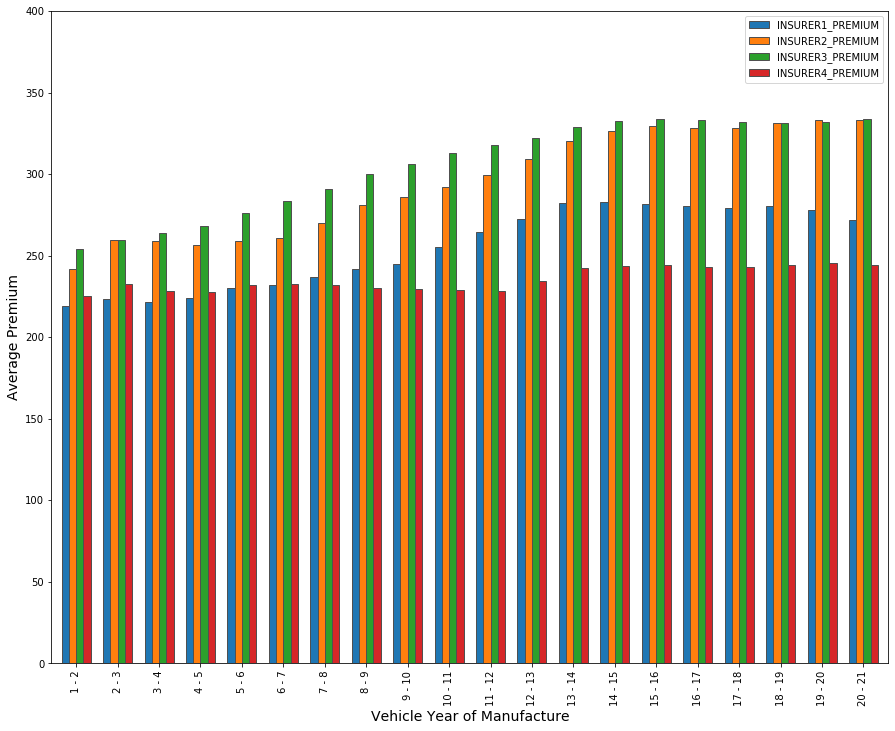

In [131]:
#Plot premiums by Vehicle Year of Manufacture
source_df = data.copy()
low_val = data[col_name].min()
high_val = data[col_name].max()
bracket_size = 1

plot = plot_df(source_df, col_name, low_val, high_val, bracket_size, insurers)

ax =  plot.plot.bar(figsize=(15,12), width=.7, edgecolor='#505050')
ax.set_ylim(0,400)
ax.set_xlabel("Vehicle Year of Manufacture", fontsize=14)
ax.set_ylabel("Average Premium", fontsize=14)

### ^^^ Observe ^^^

- Vehicle age not affecting price for Insurer 4
- Vehicle age is factored by other insurers. 
   - Likely due to older vehicled being ion poor state or just never having modern safety features
   - Older vehicle sum insired should be less. In theory premuim would be less. So Veh age is more of a factor than this chart suggests

### ^^^ Observe ^^^

- Vehicle age and Vehicle Year of manufacture should be co-linear
- Lets examine this

In [130]:
colin_df = pd.DataFrame()

colin_df['MANUFYEAR'] = data['MANUFYEAR'].value_counts().values
colin_df['VEHAGE'] = data['VEHAGE'].value_counts().values
colin_df['DIFF'] = colin_df['MANUFYEAR'] - colin_df['VEHAGE']
    
colin_df

,MANUFYEAR,VEHAGE,DIFF
0,4360,4360,0
1,4352,4352,0
2,4302,4302,0
3,4056,4056,0
4,4032,4032,0
5,4002,4002,0
6,3976,3976,0
7,3702,3702,0
8,3622,3622,0
9,3528,3528,0


### ^^^ Observe ^^^

- Vehicle age and Vehicle Year of manufacture have identical value counts

In [ ]:
# VEHAGE [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
# MANUFYEAR [1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]

In [148]:
col_name = 'MANUFYEAR'

source_df = data.copy()
low_val = data[col_name].min()
high_val = data[col_name].max()
bracket_size = 1

my_plot = plot_df(source_df, col_name, low_val, high_val, bracket_size, insurers)
my_plot 

MANUFYEAR [1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018]


,INSURER1_PREMIUM,INSURER2_PREMIUM,INSURER3_PREMIUM,INSURER4_PREMIUM
1999 - 2000,277.992184,333.224683,332.045598,245.362962
2000 - 2001,280.758310,331.663334,331.654026,244.106104
2001 - 2002,279.341584,328.494706,332.110757,242.910014
2002 - 2003,280.445598,328.521301,333.501655,243.008706
2003 - 2004,281.590748,329.258983,333.894997,244.236014
2004 - 2005,283.170601,326.427847,332.744974,243.765495
2005 - 2006,282.074847,320.329389,328.973831,242.636596
2006 - 2007,272.444981,309.031409,322.132018,234.495400
2007 - 2008,264.361717,299.243569,317.621246,228.235869
2008 - 2009,255.199885,292.139858,312.908844,229.232544


In [149]:
col_name = 'VEHAGE'

source_df = data.copy()
low_val = data[col_name].min()
high_val = data[col_name].max()
bracket_size = 1

va_plot = plot_df(source_df, col_name, low_val, high_val, bracket_size, insurers)
va_plot

VEHAGE [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


,INSURER1_PREMIUM,INSURER2_PREMIUM,INSURER3_PREMIUM,INSURER4_PREMIUM
1 - 2,219.183033,242.076078,254.112850,225.483872
2 - 3,223.507602,259.545743,259.685518,232.378151
3 - 4,221.891301,258.858940,263.736888,228.273419
4 - 5,224.196852,256.513627,268.379856,227.609734
5 - 6,230.013943,259.065528,275.909402,232.260348
6 - 7,231.856251,260.689139,283.265687,232.566832
7 - 8,236.751217,270.301705,290.866923,231.871152
8 - 9,242.155185,280.873268,299.877444,229.987883
9 - 10,244.818216,285.710860,306.357933,229.450563
10 - 11,255.199885,292.139858,312.908844,229.232544


## Data About the Driver

0    59248
1      256
Name: LICCANCNT, dtype: int64


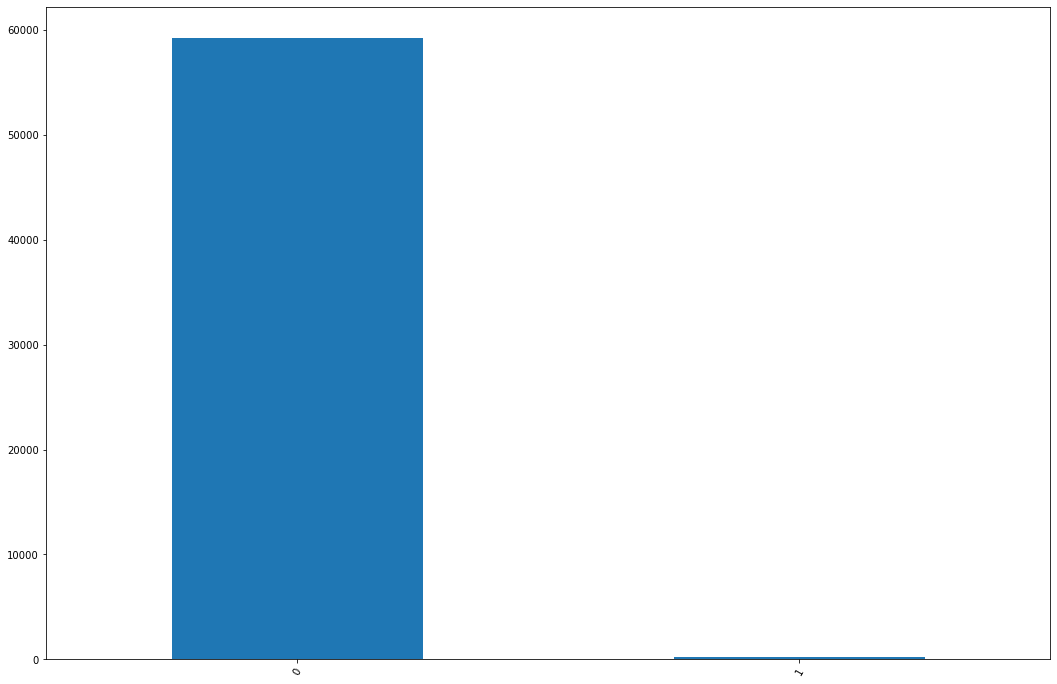

In [61]:
col_name = 'LICCANCNT'

print(numeric_column_data[col_name].value_counts())

numeric_column_data[col_name].value_counts().sort_index()[:].plot(kind='bar', figsize=(18,12), rot=60)
     
plt.show()

### ^^^ Observe ^^^

- Most drivers have no Conviction or Suspension in last 5 years (makes sense)

LICCANCNT [0 1]


Text(0, 0.5, 'Average Premium')

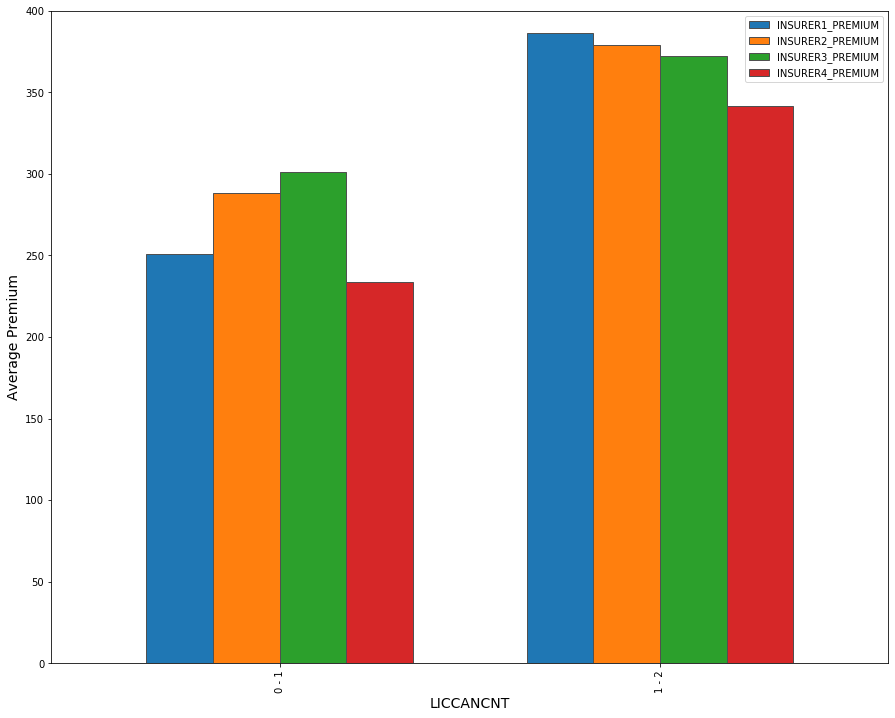

In [63]:
#Plot premiums by KM annual driven
source_df = data.copy()
low_val = data[col_name].min()
high_val = data[col_name].max()
bracket_size = 1

plot = plot_df(source_df, col_name, low_val, high_val, bracket_size, insurers)

ax =  plot.plot.bar(figsize=(15,12), width=.7, edgecolor='#505050')
ax.set_ylim(0,400)
ax.set_xlabel("LICCANCNT", fontsize=14)
ax.set_ylabel("Average Premium", fontsize=14)

### ^^^ Observe ^^^

- Clear effect on price for convictions & suspension

49    1626
38    1596
39    1582
50    1490
47    1480
      ... 
96       6
95       6
99       2
17       2
98       2
Name: OWNERAGE, Length: 82, dtype: int64


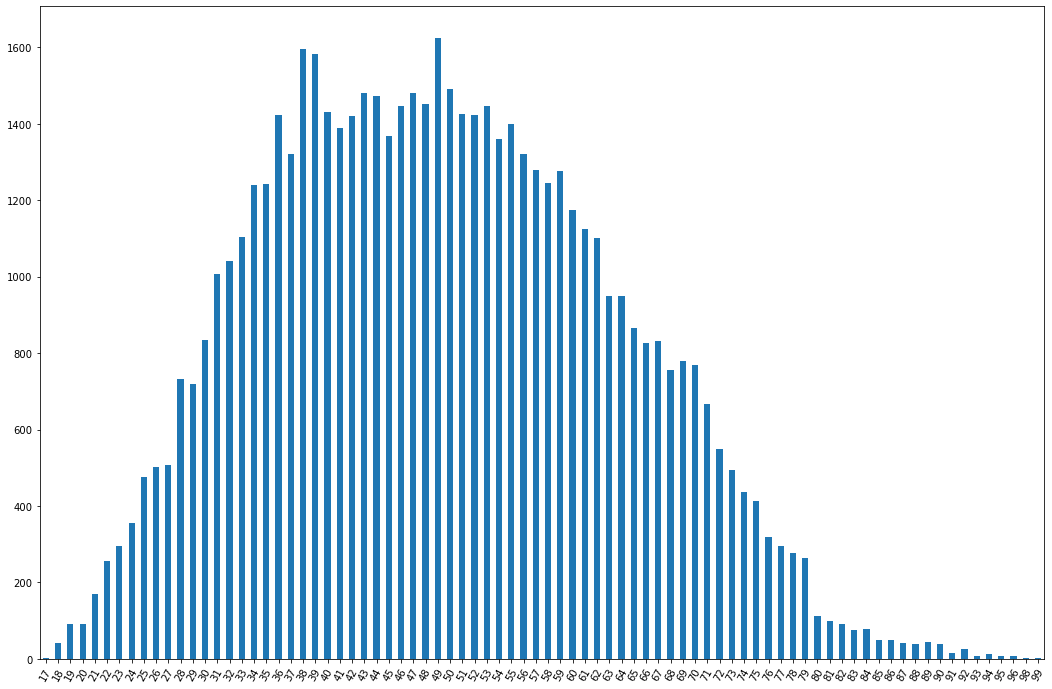

In [101]:
col_name = 'OWNERAGE'

print(numeric_column_data[col_name].value_counts())

numeric_column_data[col_name].value_counts().sort_index().plot(kind='bar', figsize=(18,12), rot=60)
     
plt.show()

### ^^^ Observe ^^^

- Normal distribution of ages. Is this expected?

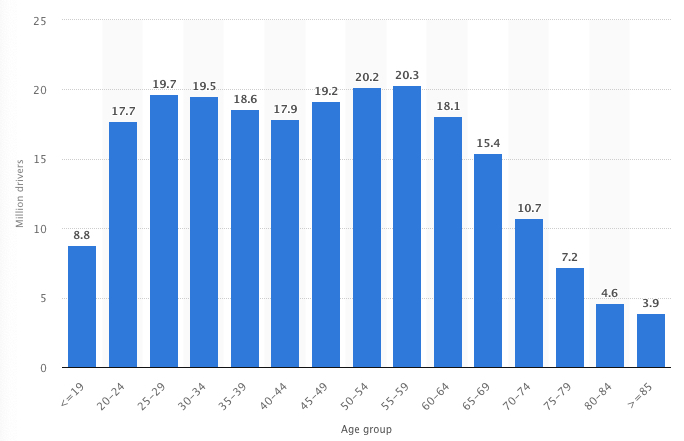

In [102]:
# Source for comparison 
# https://www.statista.com/statistics/184606/us-licensed-drivers-by-age-2008/
from IPython.display import Image
Image("US-driver-distro.jpeg")

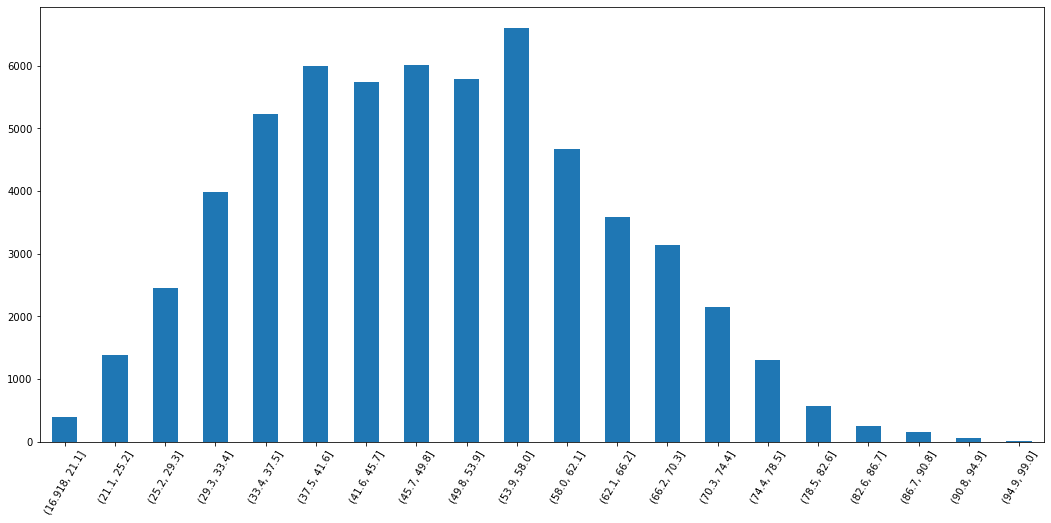

In [103]:
#Plot binned data for cpomparison
pd.cut(numeric_column_data[col_name] ,20).value_counts().sort_index().plot(kind='bar', figsize=(18,8), rot=60)

### ^^^ Observe ^^^

- Distribution is reasonable

OWNERAGE [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 90 91 92 93 94 95 96 98 99]


Text(0, 0.5, 'Average Premium')

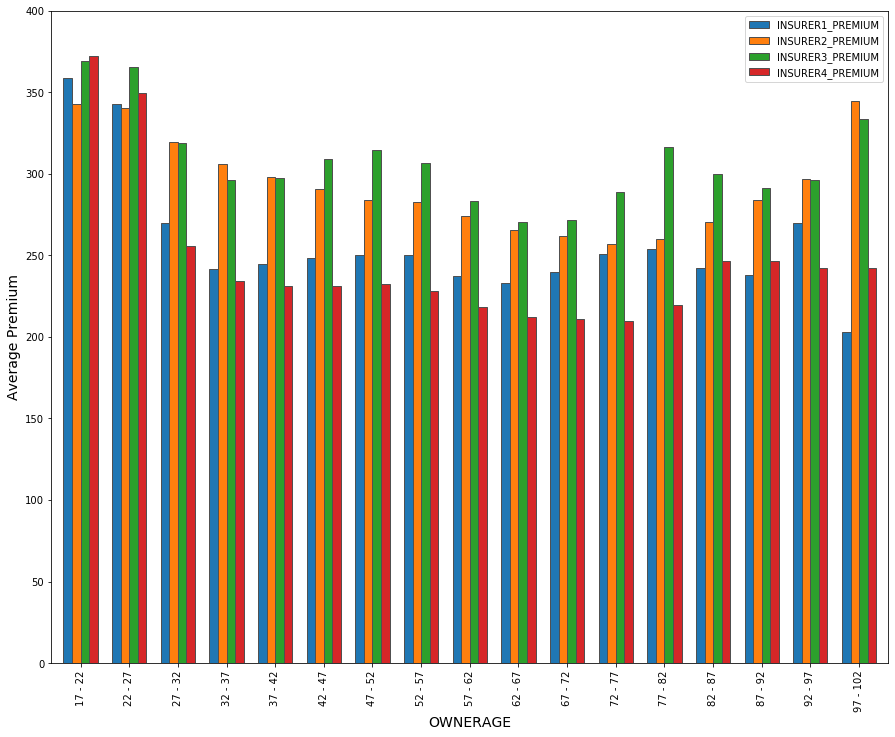

In [104]:
#Plot premiums by owner age
source_df = data.copy()
low_val = data[col_name].min()
high_val = data[col_name].max()
bracket_size = 5

plot = plot_df(source_df, col_name, low_val, high_val, bracket_size, insurers)

ax =  plot.plot.bar(figsize=(15,12), width=.7, edgecolor='#505050')
ax.set_ylim(0,400)
ax.set_xlabel("OWNERAGE", fontsize=14)
ax.set_ylabel("Average Premium", fontsize=14)

### ^^^ Observe ^^^

- In general younger drivers are priced higher
- Insurer 1 (Suncorp) is pricing for the highest age bracket appears low (revenue leak?)
- Insurers 2 & 3 are generally higer priced
- Insurer is lowest priced

38    1946
39    1868
36    1616
40    1560
49    1536
      ... 
20     210
77     200
79     176
18     110
17      14
Name: YDAGE, Length: 63, dtype: int64


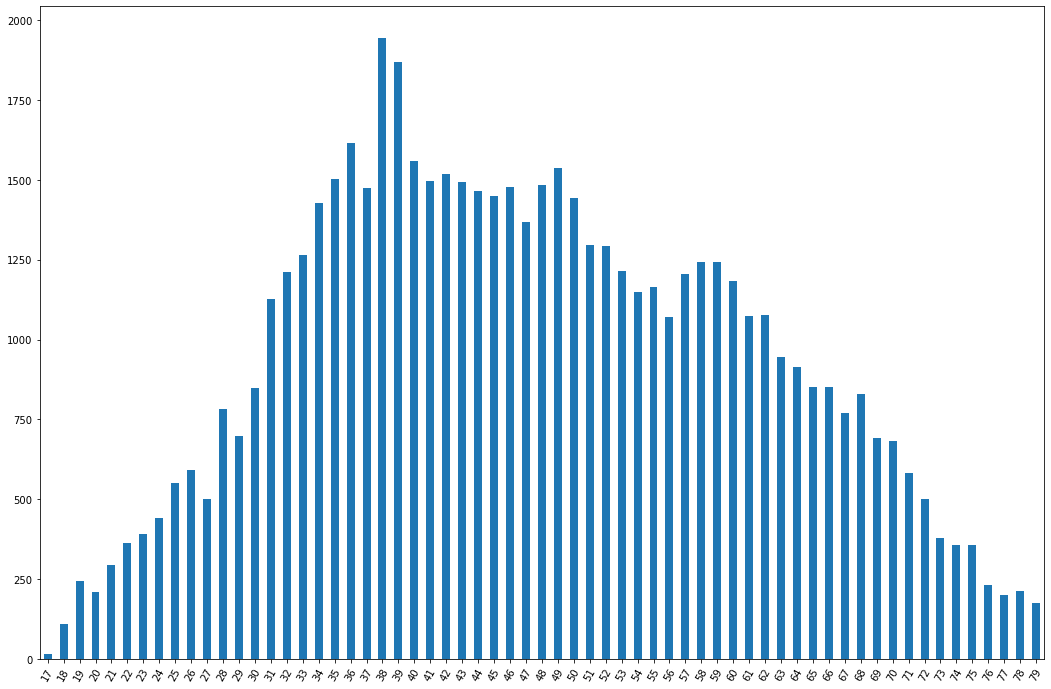

In [112]:
col_name = 'YDAGE'

print(numeric_column_data[col_name].value_counts())

numeric_column_data[col_name].value_counts().sort_index().plot(kind='bar', figsize=(18,12), rot=60)
     
plt.show()

### ^^^ Observe ^^^

- Range is smaller than Owner Age. Max = 79

YDAGE [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]


Text(0, 0.5, 'Average Premium')

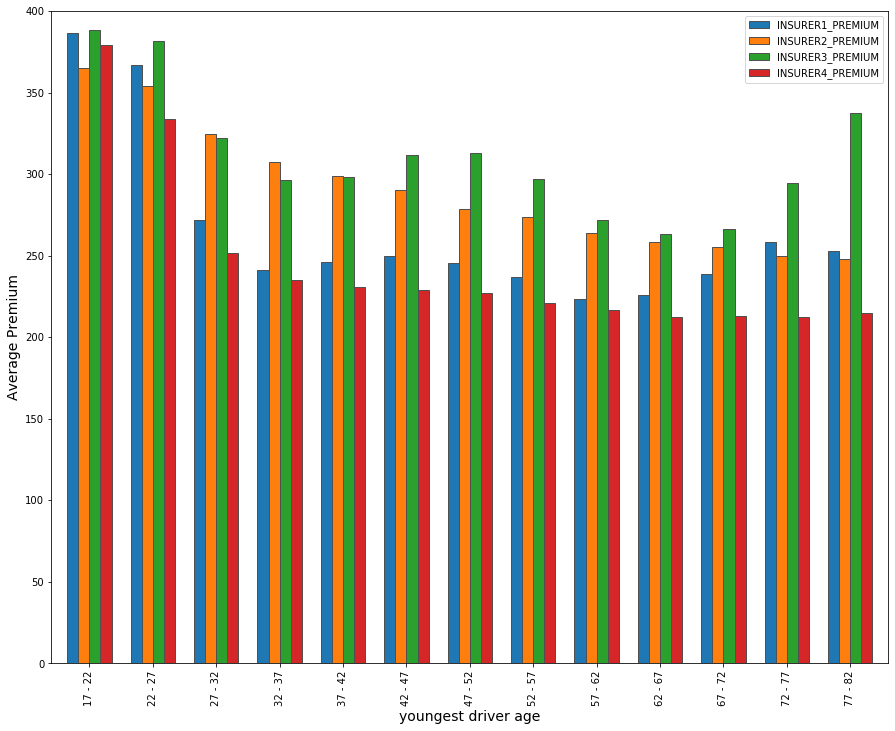

In [113]:
#Plot premiums by youngest driver age
source_df = data.copy()
low_val = data[col_name].min()
high_val = data[col_name].max()
bracket_size = 5

plot = plot_df(source_df, col_name, low_val, high_val, bracket_size, insurers)

ax =  plot.plot.bar(figsize=(15,12), width=.7, edgecolor='#505050')
ax.set_ylim(0,400)
ax.set_xlabel("youngest driver age", fontsize=14)
ax.set_ylabel("Average Premium", fontsize=14)

In [ ]:
import seaborn as sns

own_age_plot = plot_df(source_df, 'OWNERAGE', low_val, high_val, bracket_size, insurers)
yd_age_plot = plot_df(source_df, 'YDAGE', low_val, high_val, bracket_size, insurers)

In [120]:
own_age_plot

,INSURER1_PREMIUM,INSURER2_PREMIUM,INSURER3_PREMIUM,INSURER4_PREMIUM
17 - 22,358.527063,342.666027,368.882371,372.461373
22 - 27,343.024187,340.121061,365.245630,349.855657
27 - 32,269.907998,319.257757,319.067128,255.711430
32 - 37,241.356241,306.140444,296.507908,234.031861
37 - 42,244.577800,297.934170,297.218198,231.494429
42 - 47,248.581441,290.903902,309.029922,231.463457
47 - 52,250.091816,284.016617,314.391041,232.576392
52 - 57,250.174854,282.491478,306.333819,228.041973
57 - 62,237.446551,274.198802,283.073074,218.398970
62 - 67,233.196210,265.519185,270.590288,212.335709


In [118]:
yd_age_plot

,INSURER1_PREMIUM,INSURER2_PREMIUM,INSURER3_PREMIUM,INSURER4_PREMIUM
17 - 22,386.363985,365.344378,388.199668,379.178076
22 - 27,366.986967,353.948981,381.562449,333.566126
27 - 32,271.640054,324.562239,322.283847,251.878188
32 - 37,241.044130,307.614290,296.232010,235.338080
37 - 42,246.440775,298.800049,298.222152,230.884690
42 - 47,249.655563,290.303034,311.916850,229.121675
47 - 52,245.564296,278.474271,312.961214,227.226683
52 - 57,237.134323,273.530192,297.123188,221.104728
57 - 62,223.472741,264.044570,272.199776,217.009844
62 - 67,226.170242,258.320330,263.045283,212.432364


In [115]:
#make comparison table
od_minus_yd = yd_age_plot - own_age_plot 
od_minus_yd

OWNERAGE [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 90 91 92 93 94 95 96 98 99]
YDAGE [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]


,INSURER1_PREMIUM,INSURER2_PREMIUM,INSURER3_PREMIUM,INSURER4_PREMIUM
17 - 22,27.836922,22.678351,19.317298,6.716703
22 - 27,23.962780,13.827920,16.316819,-16.289532
27 - 32,1.732056,5.304482,3.216718,-3.833242
32 - 37,-0.312111,1.473845,-0.275898,1.306218
37 - 42,1.862976,0.865879,1.003954,-0.609739
42 - 47,1.074121,-0.600868,2.886929,-2.341783
47 - 52,-4.527520,-5.542346,-1.429826,-5.349709
52 - 57,-13.040531,-8.961286,-9.210630,-6.937245
57 - 62,-13.973810,-10.154232,-10.873298,-1.389125
62 - 67,-7.025967,-7.198855,-7.545005,0.096655


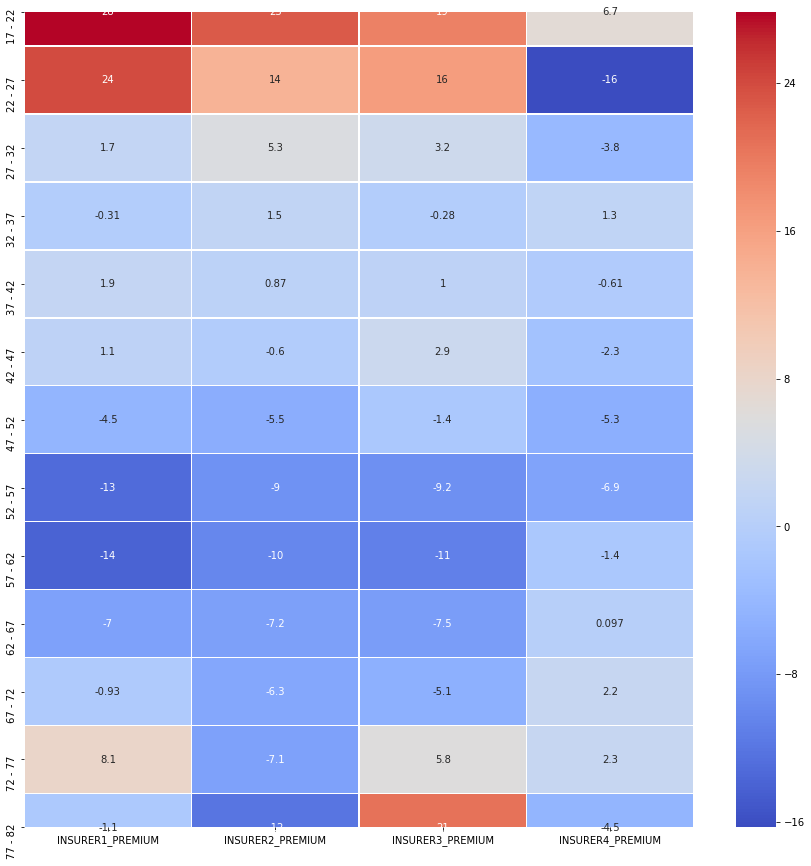

In [116]:
#plot heatmap
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(od_minus_yd, annot=True, linewidths=.5, cmap="coolwarm", ax=ax)

### ^^^ Observe ^^^

- Insurer 1 (Suncorp) - if you nominate > 27 as YD, premium is way HIGHER than if owner is > 27
- Insurer 1 (Suncorp) - if you nominate 50-60 as YD, premium is way LOWER than if owner is 50-60

- Insurer 2 & 3 - if you nominate > 27 as YD, premium is HIGHER than if owner is > 27
- Insurer 3 - if you nominate 77+ as YD, premium is way HIGHER than if owner is 77+
- Insurer 4 - if you nominate 22-27 as YD, premium is way LOWER than if owner is 22-27 (this seems errant)


15    47576
10     6404
5      3614
20     1324
99      586
Name: YEARLYKM, dtype: int64


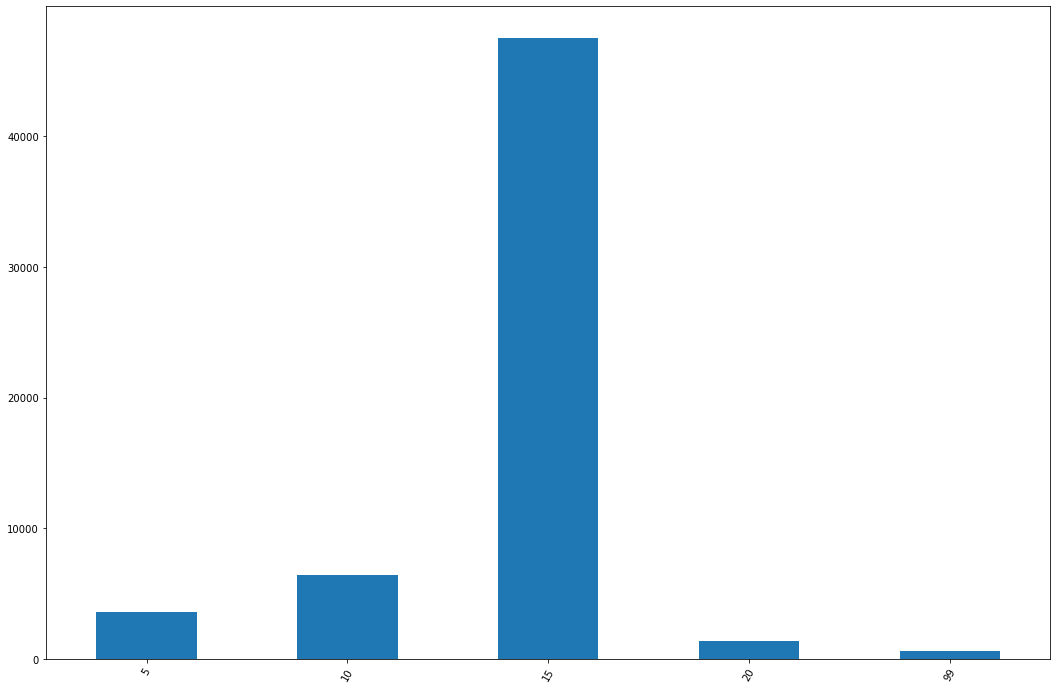

0    59248
1      256
Name: LICCANCNT, dtype: int64


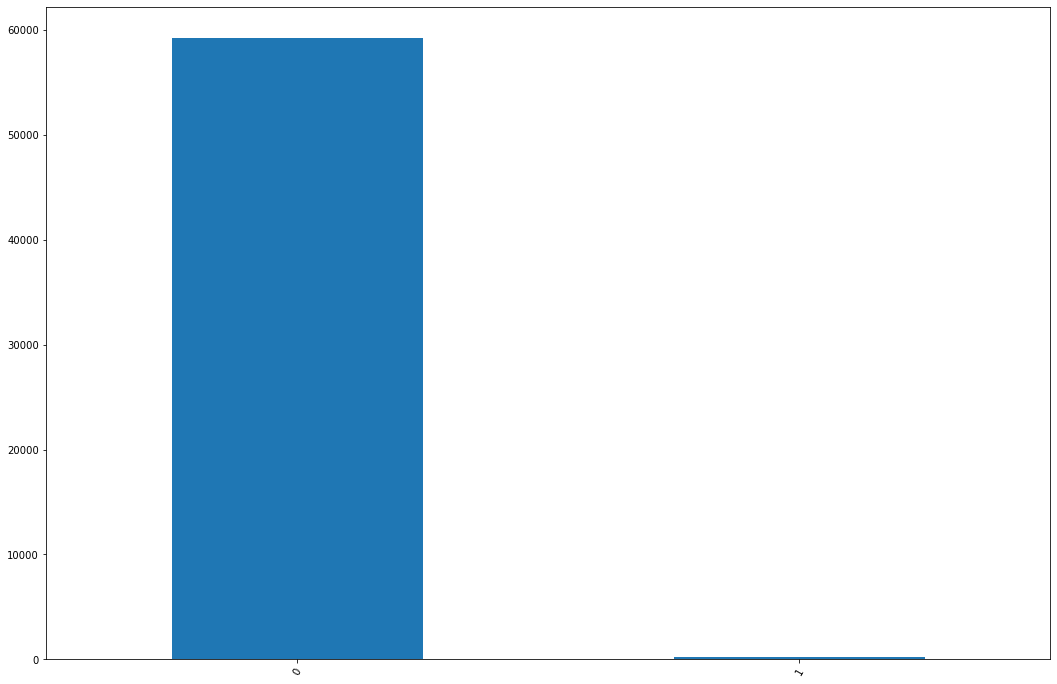

49    1626
38    1596
39    1582
50    1490
47    1480
      ... 
96       6
95       6
99       2
17       2
98       2
Name: OWNERAGE, Length: 82, dtype: int64


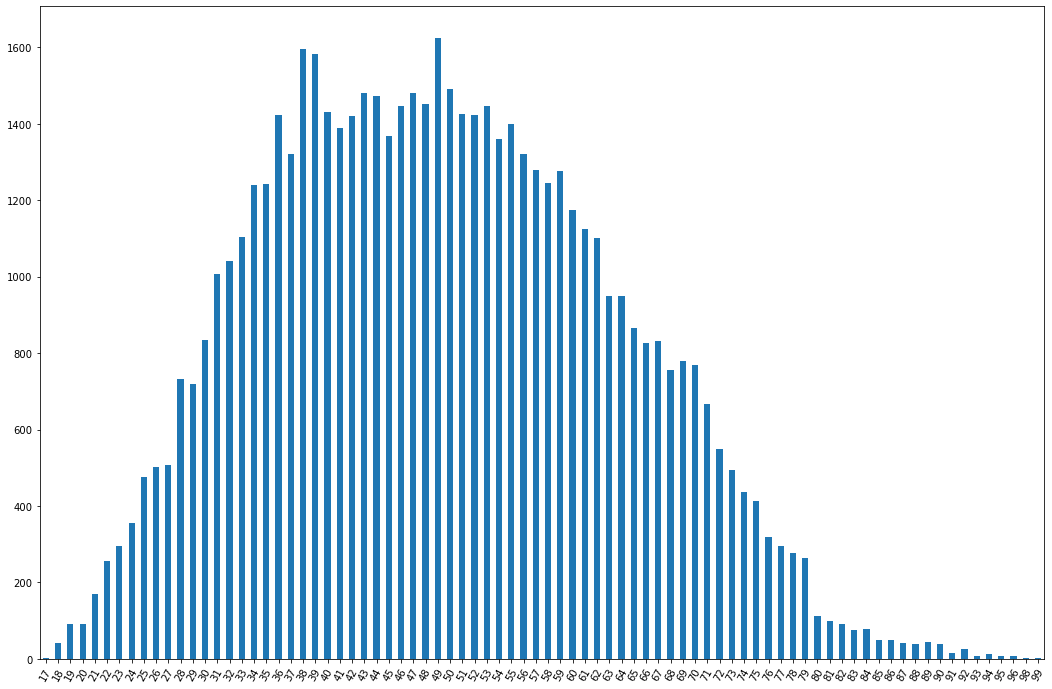

0    19668
4    19500
1     9798
3     5304
2     5234
Name: MVINSYEARS, dtype: int64


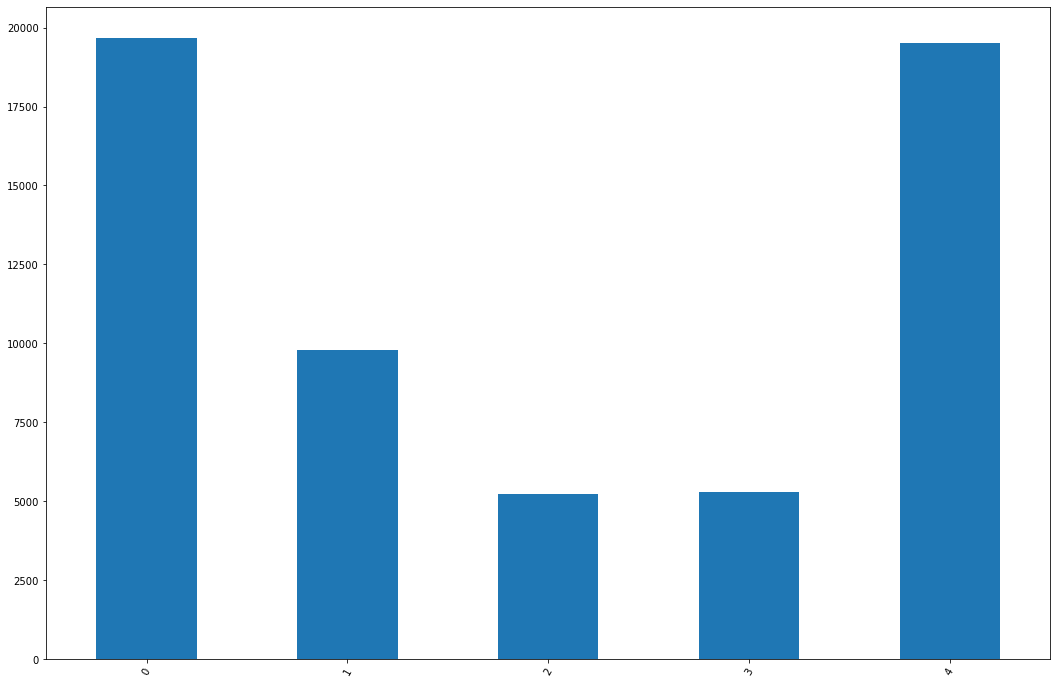

2014    4360
2010    4352
2015    4302
2013    4056
2007    4032
2008    4002
2012    3976
2011    3702
2016    3622
2009    3528
2006    3266
2005    3050
2004    2896
2003    2530
2017    1900
2002    1730
2001    1494
2000    1340
1999     988
2018     378
Name: MANUFYEAR, dtype: int64


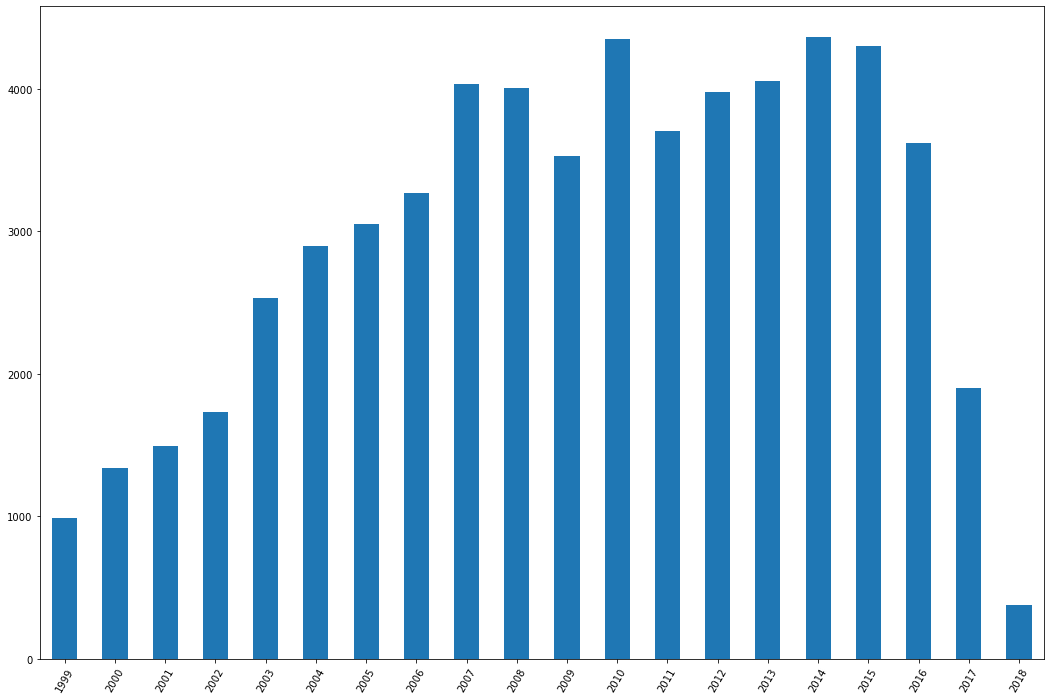

38    1946
39    1868
36    1616
40    1560
49    1536
      ... 
20     210
77     200
79     176
18     110
17      14
Name: YDAGE, Length: 63, dtype: int64


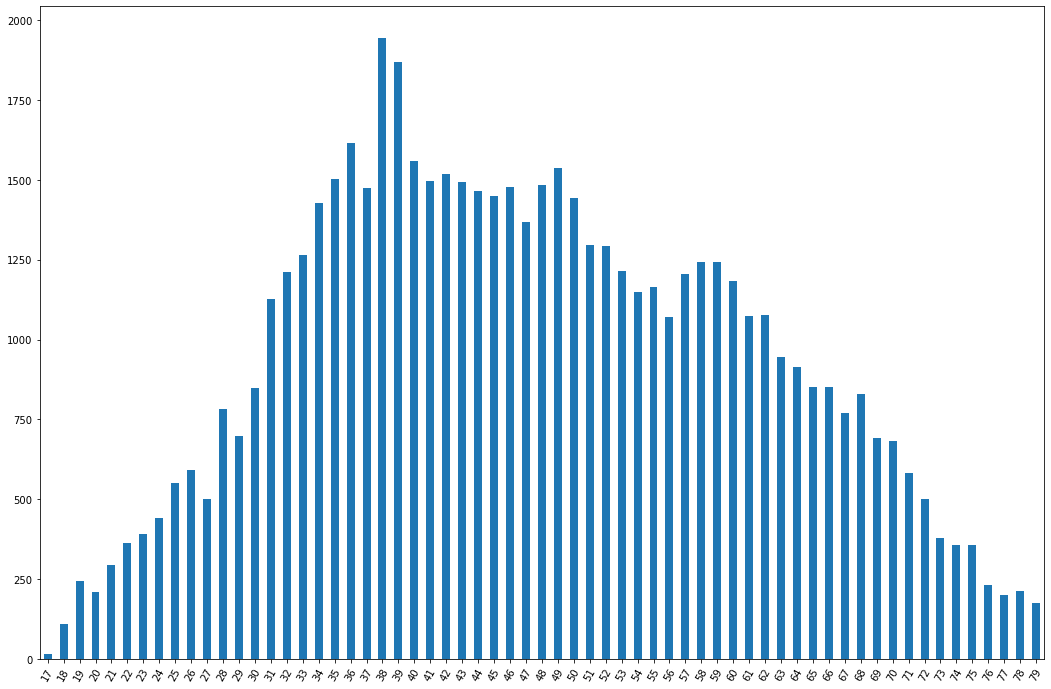

0    58304
1     1200
Name: ATFAULTACCDS, dtype: int64


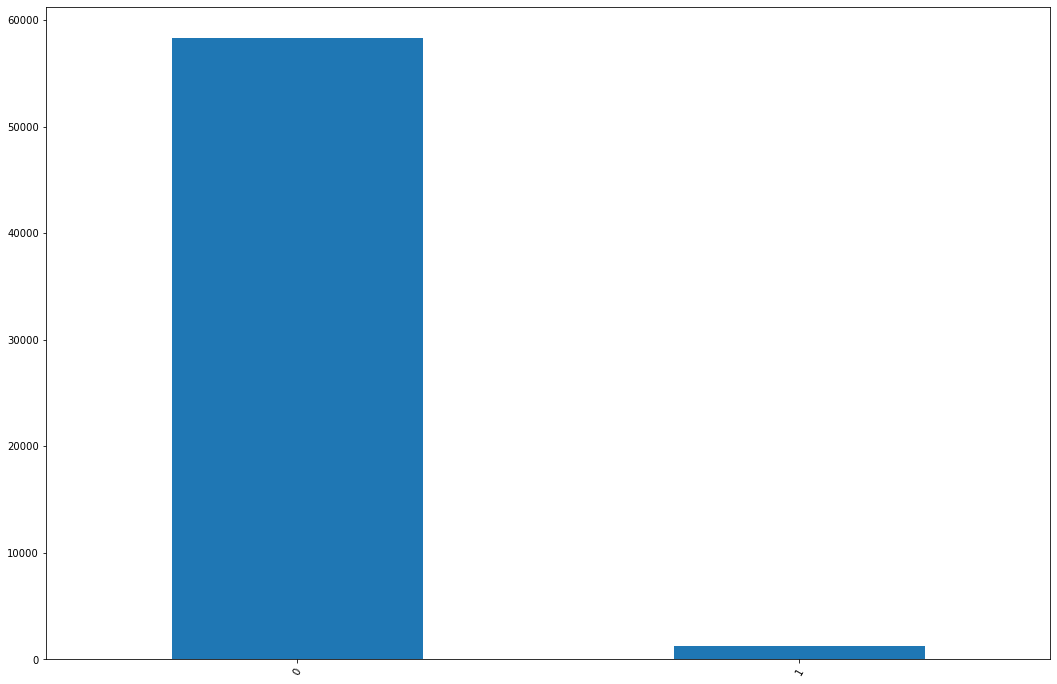

-1     19668
 5     14110
 1      9798
 3      9266
 2      5234
 10     1156
 25      272
Name: NRMAASST, dtype: int64


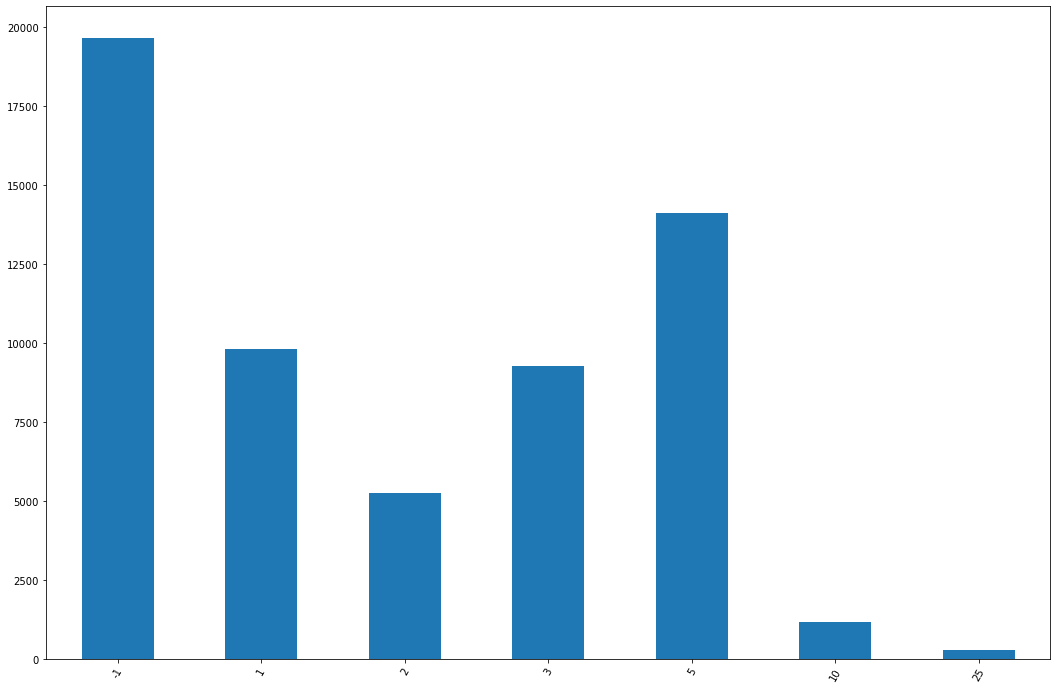

6    50680
0     5446
5      774
3      738
2      706
4      638
1      522
Name: NOYRLICOBT, dtype: int64


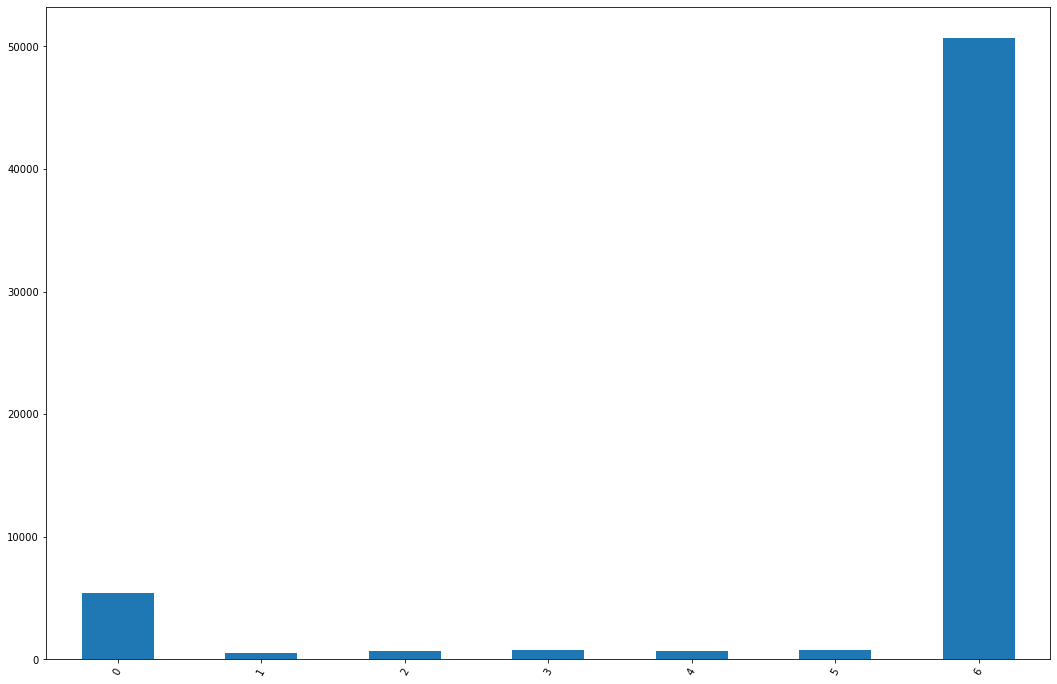

0     53928
3      1586
2      1022
1       804
4       626
6       502
5       262
7       204
8       144
9        96
13       94
10       80
14       58
12       56
11       42
Name: DEMERITPTS, dtype: int64


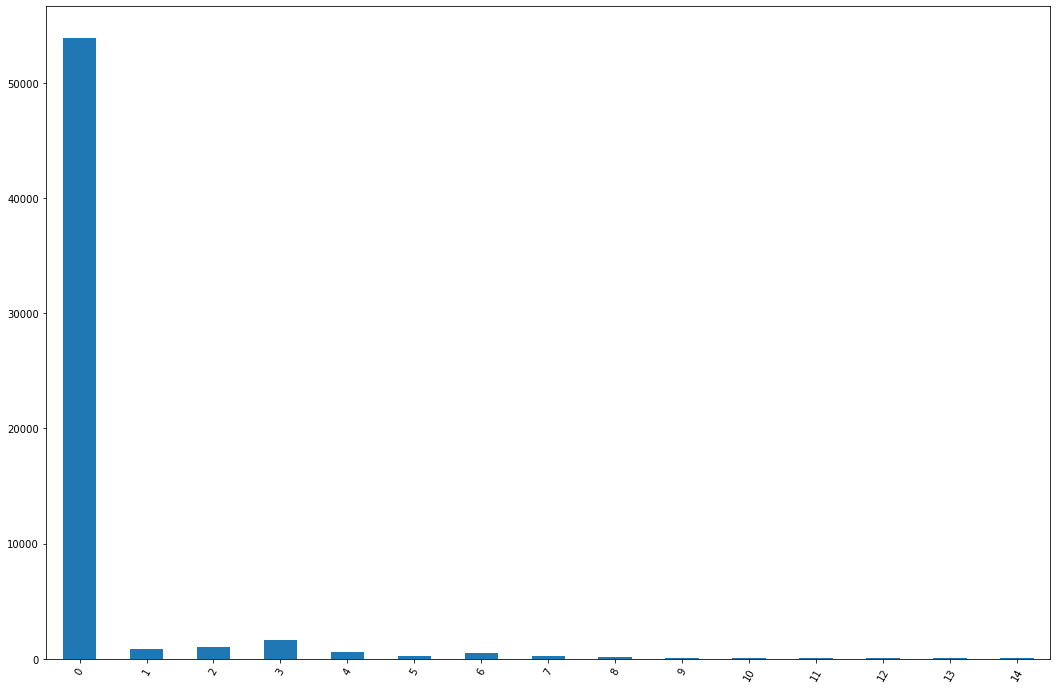

0     34310
60    25194
Name: NCBPCT, dtype: int64


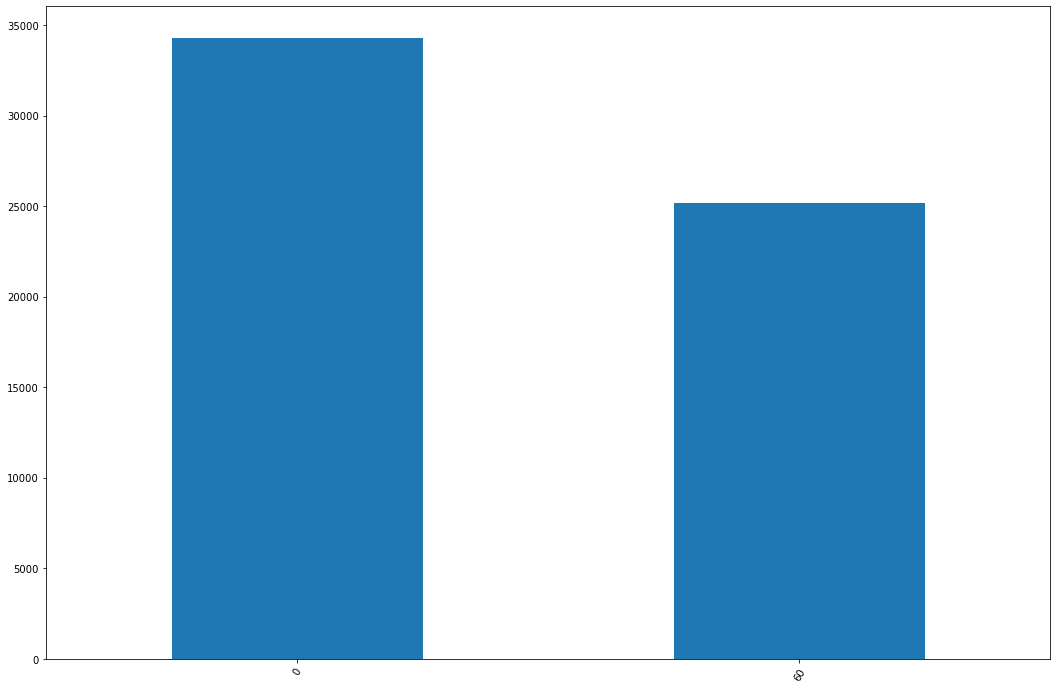

5     4360
9     4352
4     4302
6     4056
12    4032
11    4002
7     3976
8     3702
3     3622
10    3528
13    3266
14    3050
15    2896
16    2530
2     1900
17    1730
18    1494
19    1340
20     988
1      378
Name: VEHAGE, dtype: int64


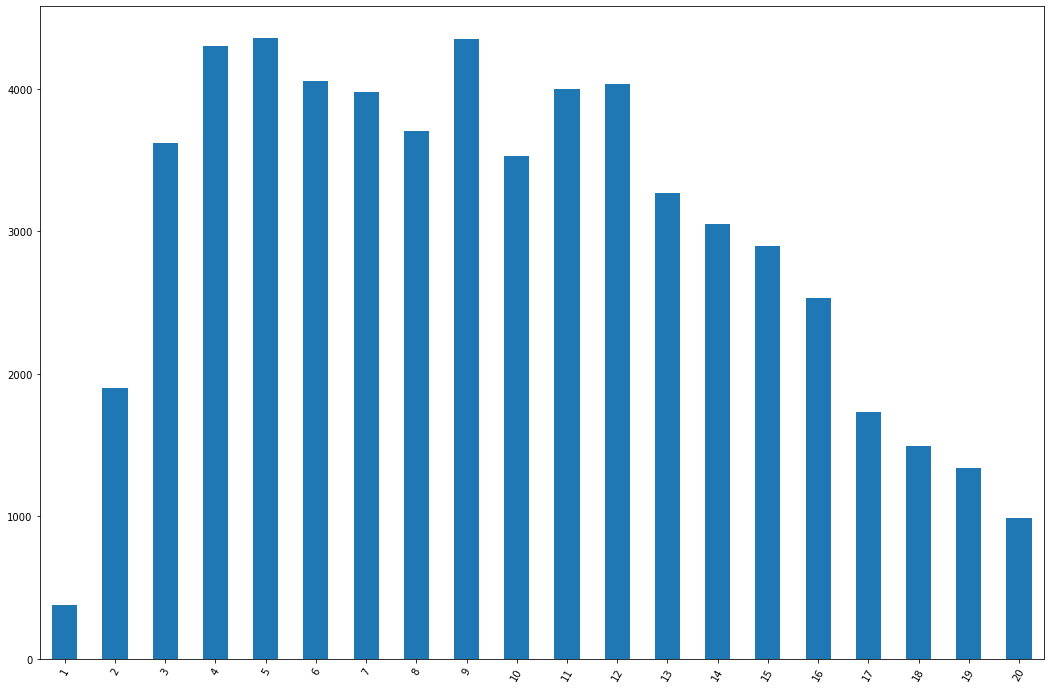

In [31]:
#Take non-numeric columns (excluding the target vairables / premiums)
test = data[['YEARLYKM', 'LICCANCNT', 'OWNERAGE', 'MVINSYEARS', 'MANUFYEAR', 'YDAGE',
       'ATFAULTACCDS', 'NRMAASST', 'NOYRLICOBT', 'DEMERITPTS', 'NCBPCT',
       'VEHAGE']]

#examine distribution (of tests conducted)
for col in test.columns:
    #Show value counts in order of count
    print(test[col].value_counts())
   
    #sort_index reorders the df after the count unorders it
    data[col].value_counts().sort_index()[:].plot(kind='bar', figsize=(18,12), rot=60)
    
    plt.show()
    
#Note: Y-axis in number of experiments run

In [18]:
#Get all atfaultaccident tests
data[data['ATFAULTACCDS'] == 1]

,YEARLYKM,LICCANCNT,OWNERAGE,MVINSURER,REGUSE,MAKE,MVINSYEARS,MANUFYEAR,YDAGE,MODEL,...,COMREGVEH,YDGENDER,ATFAULT5YRS,SHAPE,VEHAGE,INSURER1_PREMIUM,INSURER2_PREMIUM,INSURER3_PREMIUM,INSURER4_PREMIUM,COMMENCEDATE
10,15,0,48,GIO,PRIV,FORD,4,2005,48,FOCUS,...,N,M,Y,SED,14,386.363985,386.581143,388.199668,225.469194,2019-07-01
203,15,0,36,AAMI,PRIV,VOLVO,0,2006,36,XC90,...,N,M,Y,WAG,13,386.363985,386.581143,388.199668,225.469194,2019-07-01
252,15,0,20,OTH,PRIV,HONDA,2,2002,42,CR-V,...,N,F,Y,PVF,17,386.363985,386.581143,388.199668,385.337296,2019-07-01
290,15,0,27,AAMI,PRIV,HONDA,2,1999,27,CIVIC,...,N,M,Y,SED,20,386.363985,386.581143,388.199668,291.633350,2019-07-01
361,15,0,40,AAMI,PRIV,TOYOTA,4,2012,40,RAV4,...,N,F,Y,WAG,7,386.363985,386.581143,388.199668,211.132098,2019-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59300,15,0,78,GIO,PRIV,TOYOTA,4,2009,75,CAMRY,...,N,F,Y,SED,10,386.363985,385.179325,388.199668,198.825231,2019-09-01
59310,15,0,29,AAMI,PRIV,HOLDEN,0,2009,29,COMMODORE,...,N,M,Y,SED,10,386.363985,385.179325,388.199668,273.097284,2019-09-01
59353,15,0,71,GIO,PRIV,VOLKSWAGEN,2,2008,64,TOUAREG,...,N,M,Y,PVF,11,386.363985,385.179325,353.358118,198.825231,2019-09-01
59417,15,0,52,GIO,PRIV,VOLKSWAGEN,0,2001,35,GOLF,...,N,F,Y,SED,18,386.363985,385.179325,388.199668,225.469194,2019-09-01


ATFAULTACCDS [0 1]


Text(0, 0.5, 'Average Premium')

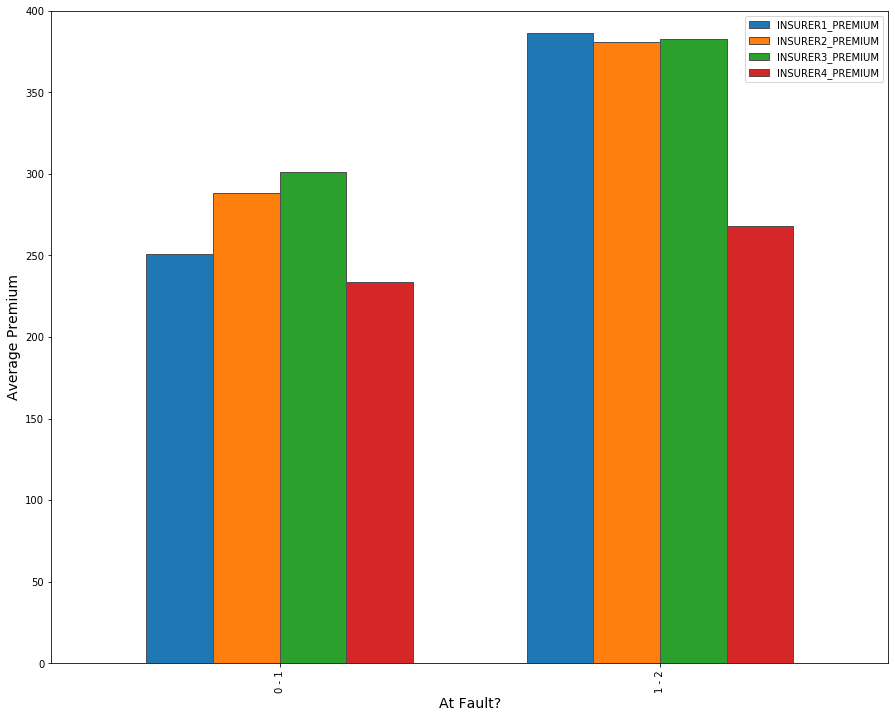

In [22]:
#Premiums by youngest driver age
source_df = data
col_name = 'ATFAULTACCDS'
low_val = data.ATFAULTACCDS.min()
high_val = data.ATFAULTACCDS.max()
bracket_size = 1

yd_age_plot = plot_df(source_df, col_name, low_val, high_val, bracket_size, insurers)
ax =  yd_age_plot.plot.bar(figsize=(15,12), width=.7, edgecolor='#505050')
ax.set_ylim(0,400)
ax.set_xlabel("At Fault?", fontsize=14)
ax.set_ylabel("Average Premium", fontsize=14)

In [ ]:
#Observe non-numeric columns
data.select_dtypes(exclude=[np.number]).head(9).T

In [ ]:
#Take non-numeric columns
test = data.select_dtypes(exclude=[np.number]) 

#examine distribution (of tests conducted)
for col in test.columns:
    print(test[col].value_counts())
    #plot top 20 items
    data[col].value_counts()[:20].plot(kind='bar', figsize=(18,12), rot=60)
    plt.show()

In [ ]:
Toyota 20.5 per cent 16,700 salesMazda with the biggest crash (down 32% with less than 7300 sales), following 30 per cent sales slumps for the pricier new Mazda3 (about 2000 sales) and the CX-5 mid-size SUV (1800).

Hyundai (down 8.5%) 

Mazda (9.0%).

Holden (-18%), Ford (-17.5%) and Mitsubishi (-13%) were other big losers in August, following sales slumps of all models except Trailblazer, Transit and ASX, Eclipse Cross and Triton 4x2 respectively.

Nevertheless Mitsubishi outpaced Ford to place fourth place for the month, ahead of an advancing Kia and Nissan (thanks to strong Cerato and QASHQAI sales), with Volkswagen, Holden and Subaru rounding out the top 10

In [ ]:
data[['MAKE', 'MODEL']].drop_duplicates().sort_values(by=['MAKE'])[:50]

In [ ]:
df = data['MODEL'].value_counts().to_frame()
df[df.MODEL > 300]

In [ ]:
#https://www.goauto.com.au/news/vfacts/sales-2019/vfacts-vehicle-market-decline-accelerates/2019-09-04/79867.html
#sales_au_sep_19 = pd.read_clipboard()
#sales_au_sep_19 = sales_au_sep_19.drop('Variance%', axis=1)
sales_au_sep_19

### Ideas...

### per insurer show 

- Premuim by owner age (binned)
- Premuim by youngest driver age (binned)

- Premuim by vehicle age (binned)

- Primium by make/model (popular cars)
- Premuim by at fault5yrs


### Let's plot some data

In [ ]:
data.columns

In [ ]:
#Boxplot for ranges
data.boxplot(figsize=(18,12), rot=60)

# !!! MANUFYEAR, INSURER_X_PREMIUMS & rest are in different ranges lets plot them separately

In [ ]:
data.drop(columns=['MANUFYEAR', 'INSURER1_PREMIUM','INSURER2_PREMIUM', 'INSURER3_PREMIUM', 'INSURER4_PREMIUM']).boxplot(figsize=(18,12), rot=60)

In [ ]:
#Insurer premuims
data[['INSURER1_PREMIUM','INSURER2_PREMIUM', 'INSURER3_PREMIUM', 'INSURER4_PREMIUM']].boxplot(figsize=(18,12), rot=60)

In [ ]:
data[['INSURER1_PREMIUM','INSURER2_PREMIUM', 'INSURER3_PREMIUM', 'INSURER4_PREMIUM']].hist(figsize=(18,12), layout=(1,4), sharey=True)

In [ ]:
ins2_p1 = data[data['COMMENCEDATE'] == '2019-07-01']['INSURER2_PREMIUM']
ins2_p2 = data[data['COMMENCEDATE'] == '2019-09-01']['INSURER2_PREMIUM']

plt.hist(ins2_p1, alpha=0.5)
plt.hist(ins2_p2, alpha=0.5)

#data[['INSURER1_PREMIUM','INSURER2_PREMIUM', 'INSURER3_PREMIUM', 'INSURER4_PREMIUM', 'COMMENCEDATE']].groupby('COMMENCEDATE').hist(figsize=(18,8), layout=(1,4), sharey=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a197fa128>,
      dtype=object)

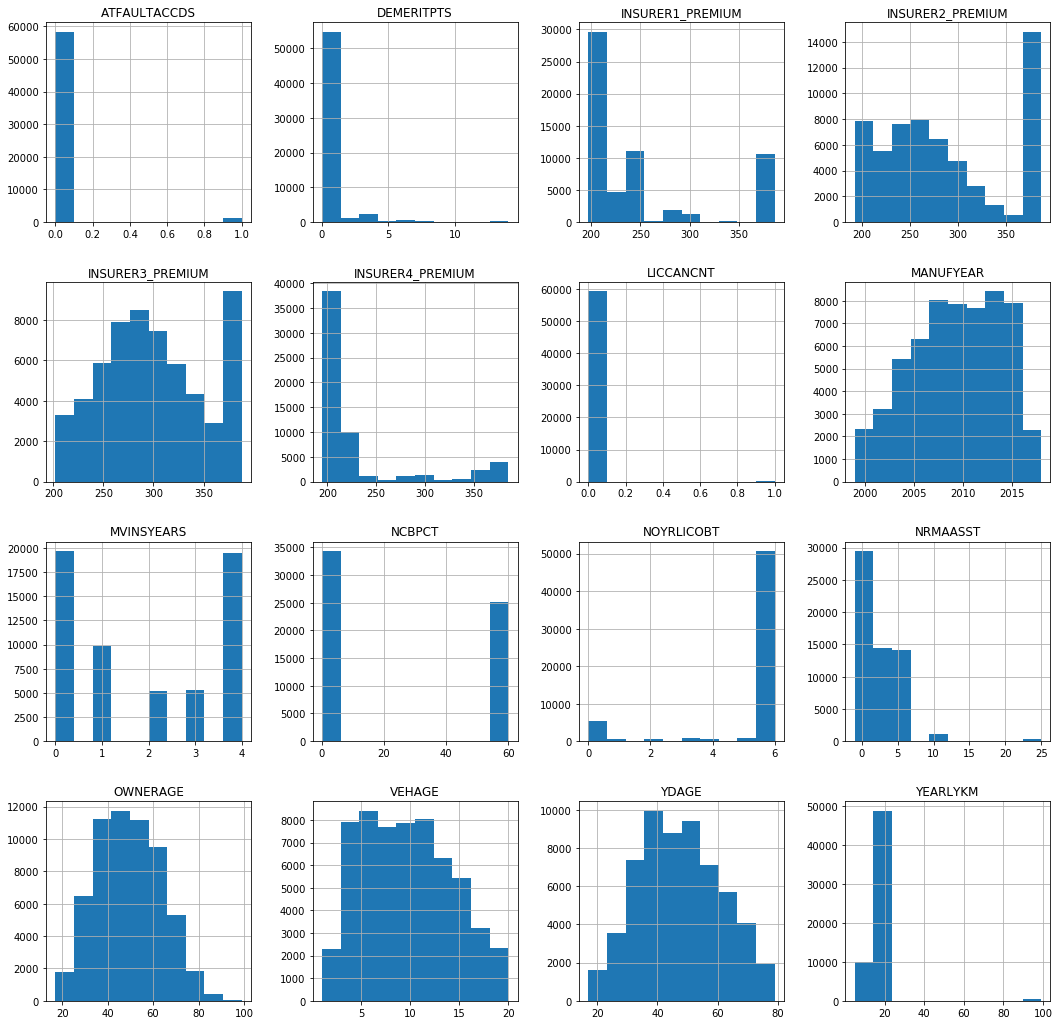

In [167]:
data.hist(figsize=(18,18))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2fb2ca58>,
      dtype=object)

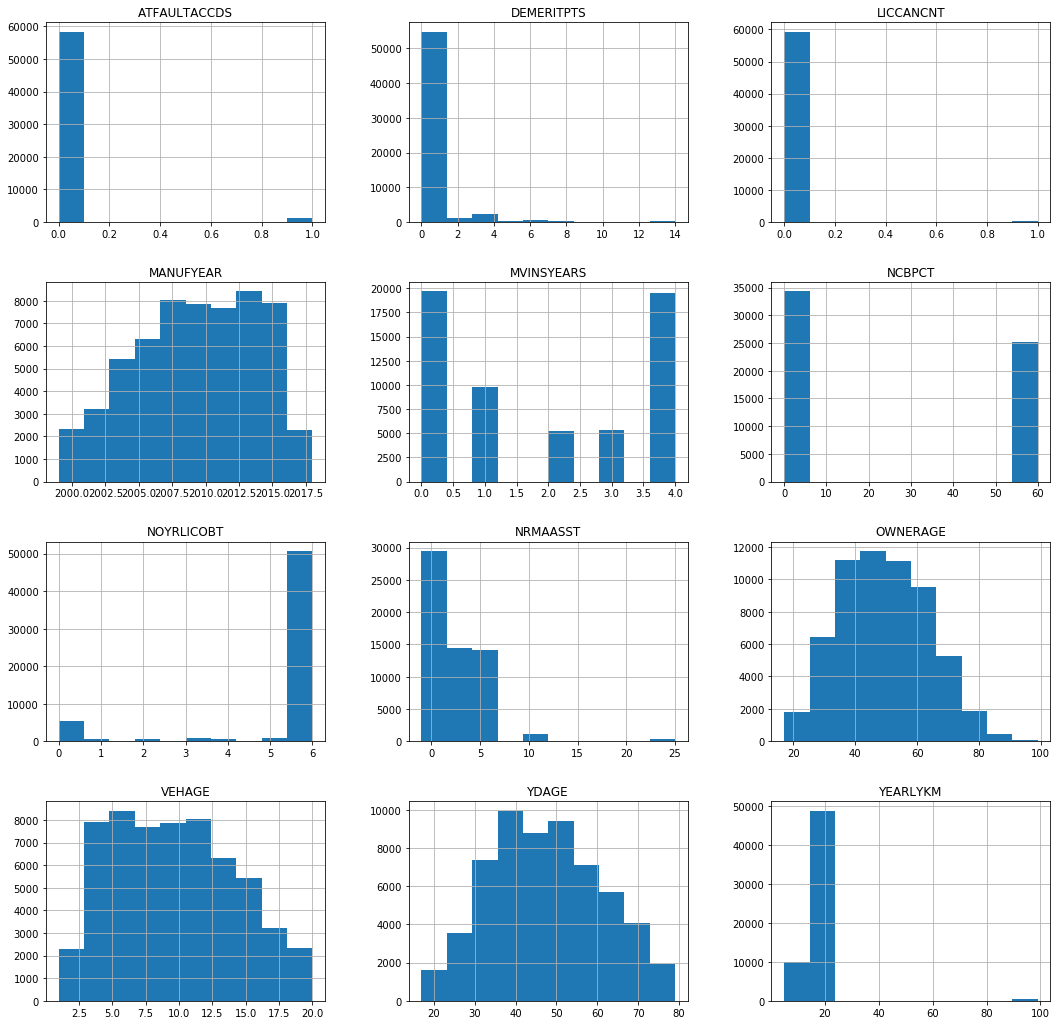

In [25]:
data[['YEARLYKM', 'LICCANCNT', 'OWNERAGE', 'MVINSURER', 'REGUSE', 'MAKE',
       'MVINSYEARS', 'MANUFYEAR', 'YDAGE', 'MODEL', 'ATFAULTACCDS', 'NRMAASST',
       'NOYRLICOBT', 'MVINSTYPE', 'DEMERITPTS', 'NCBPCT', 'COMREGVEH',
       'YDGENDER', 'ATFAULT5YRS', 'SHAPE', 'VEHAGE']].hist(figsize=(18,18))

In [2]:
data.iloc[:, -3:-2].hist(figsize=(18,18))

NameError: name 'data' is not defined

In [21]:
#copy ther source data
comp_df = data.copy()

#extract just type 'C' tests
comp_df = comp_df[comp_df.MVINSTYPE == "C"]

#show what % were type C of all tests
print(str(round((comp_df.shape[0] / data.shape[0])*100, 2)) + '% are Comprehensive')

93.25% are Comprehensive


Text(0, 0.5, 'Test Configurations')

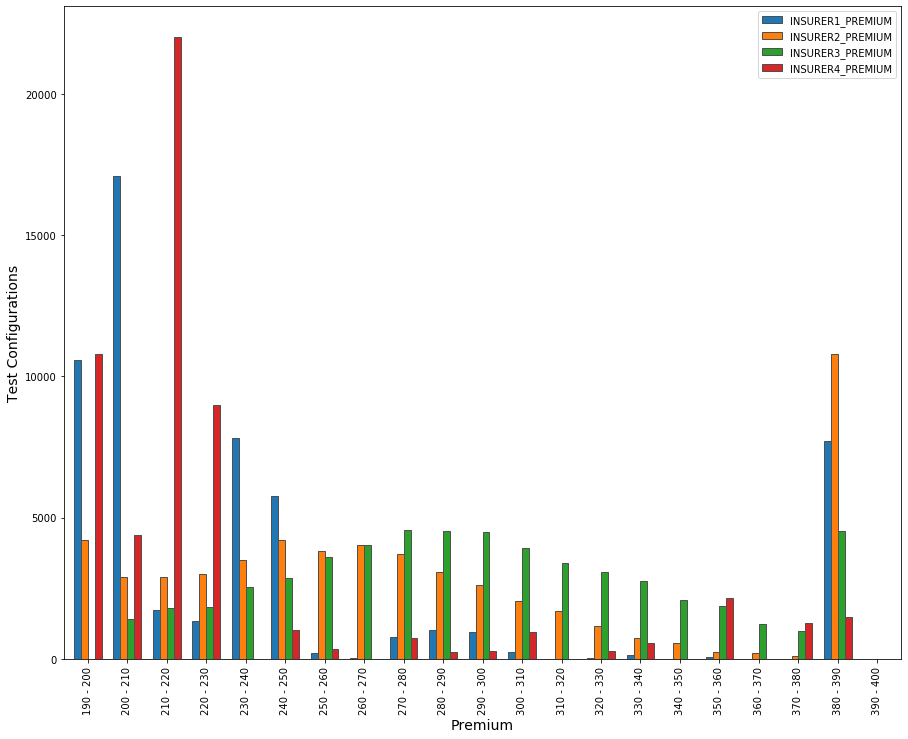

In [22]:
#plot the distribution
test_distribution =  plot_count_df(comp_df, 190, 390, 10, insurers)

ax = test_distribution.plot.bar(figsize=(15,12), width=.7, edgecolor='#505050')
ax.set_xlabel("Premium", fontsize=14)
ax.set_ylabel("Test Configurations", fontsize=14)

### Price Distribution (above)

- The same test configurations were run for all insurers
- I4 is the lowest cost overall
- I2 has a fairly normal Distribution
- I3 shows a VERY normal distribution
- Why the so many at 380? Have all premiums above 380 been rolled up?

In [574]:
#plot_count_df(p1_comp_df, 190, 380, 10, insurers)

In [573]:
#plot_count_df(p2_comp_df, 190, 380, 10, insurers)

### Premiums by owner driver age

- I4 punishes young drivers the most (distracted by phones?)
- I3 punishes people in thier 40s and 50s (distracted by kids?)
- I3 punishes older drivers over 65
- I2 & I4 do not punish older drivers
- There is a big proce difference between I3 and I4
- Pricing highest to lowest in general is I3 -> I2 -> I1 -> I4

OWNERAGE [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 90 91 92 93 94 95 96 98 99]


Text(0, 0.5, 'Average Premium')

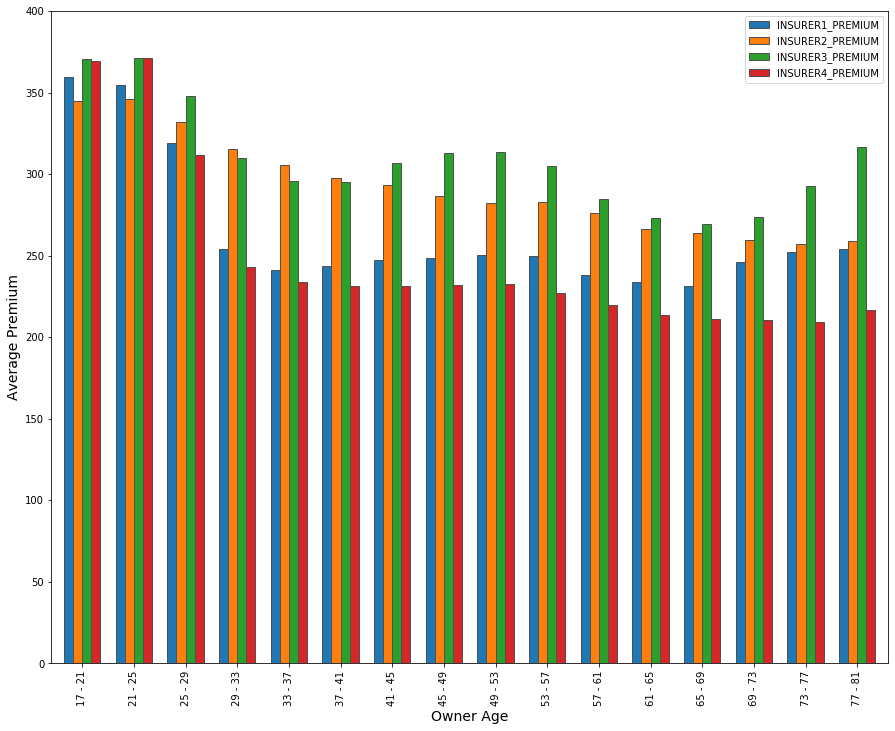

In [533]:
#Premiums by owner driver age  !!CAPPED at 79 to be compared to YDRIVER chart above
source_df = data
col_name = 'OWNERAGE'
low_val = data.OWNERAGE.min()
#high_val = data.OWNERAGE.max()
high_val = 79
bracket_size = 4

own_age_plot = plot_df(source_df, col_name, low_val, high_val, bracket_size, insurers)

ax = own_age_plot.plot.bar(figsize=(15,12), width=.7, edgecolor='#505050')
ax.set_ylim(0,400)
ax.set_xlabel("Owner Age", fontsize=14)
ax.set_ylabel("Average Premium", fontsize=14)

In [502]:
own_age_plot

,INSURER1_PREMIUM,INSURER2_PREMIUM,INSURER3_PREMIUM,INSURER4_PREMIUM
17 - 21,359.649015,344.706226,370.592463,369.634035
21 - 25,354.684020,346.395731,371.118085,371.171919
25 - 29,319.193426,331.751587,347.835404,311.919784
29 - 33,254.311983,315.331817,309.955070,243.212772
33 - 37,241.296800,305.554643,295.669074,233.905569
37 - 41,243.657678,297.614650,295.378386,231.468329
41 - 45,247.285599,293.463834,306.801089,231.227463
45 - 49,248.773409,286.698185,312.954829,231.976947
49 - 53,250.732948,282.166620,313.720206,232.834463
53 - 57,249.674541,282.902244,305.062506,227.379941


YDAGE [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]


Text(0, 0.5, 'Average Premium')

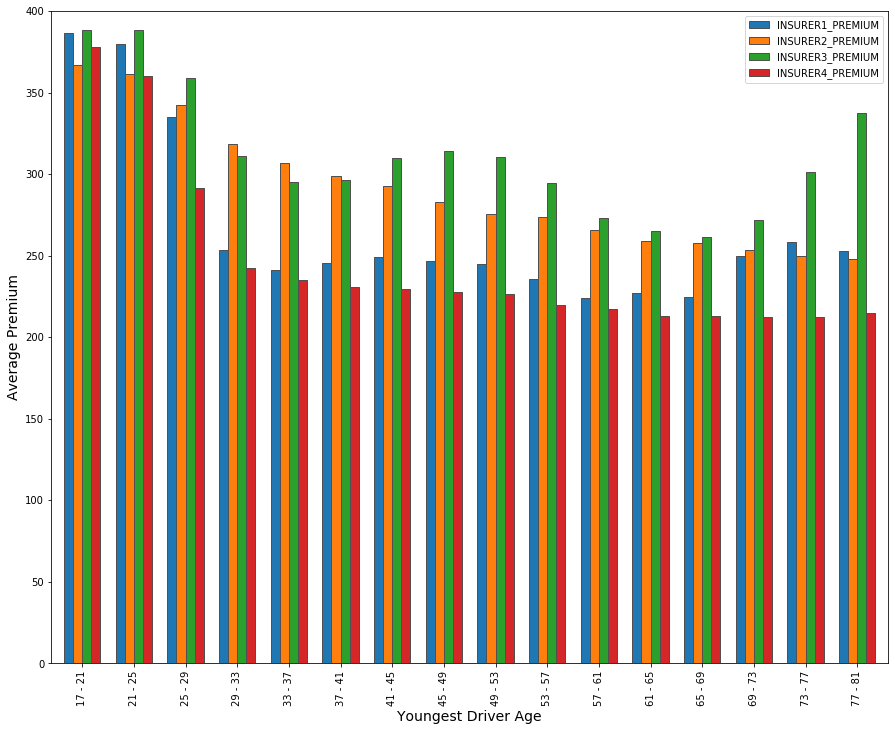

In [534]:
#Premiums by youngest driver age
source_df = data
col_name = 'YDAGE'
low_val = data.YDAGE.min()
high_val = data.YDAGE.max()
bracket_size = 4

yd_age_plot = plot_df(source_df, col_name, low_val, high_val, bracket_size, insurers)
ax =  yd_age_plot.plot.bar(figsize=(15,12), width=.7, edgecolor='#505050')
ax.set_ylim(0,400)
ax.set_xlabel("Youngest Driver Age", fontsize=14)
ax.set_ylabel("Average Premium", fontsize=14)

### Premiums by youngest driver age

- All insurers punishes young drivers the most (distracted by phones?)
- I3 punishes people in thier 40s and 50s (distracted by kids?)
- I3 punishes older drivers over 65
- I2 & I4 do not punish older drivers
- There is a big proce difference between I3 and I4

### Compare driver age vs. Youngest driver pricing

- I1 (i2 & I3) becomes more expensive with younger driver <30
- I4 becomes cheaper for 25-27 year olds??
- I1, I2 & I3 improve pricing when youngerst drivers in 50s & 60s
- I3 has a penalty when youngest driver is 79-81

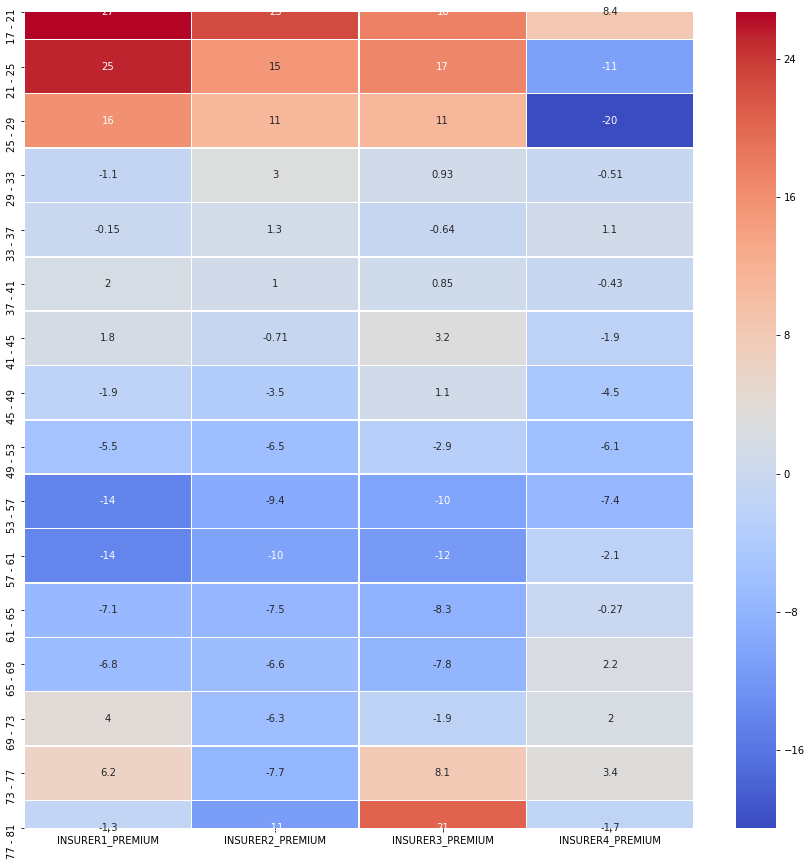

In [451]:
import seaborn as sns

#make comparison table
od_minus_yd = yd_age_plot - own_age_plot 
#plot heatmap
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(od_minus_yd, annot=True, linewidths=.5, cmap="coolwarm", ax=ax)

### Premiums by vehicle age

- Observe: Manufactured Year & Vehicle age are colinear

MANUFYEAR [1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018]


Text(0, 0.5, 'Average Premium')

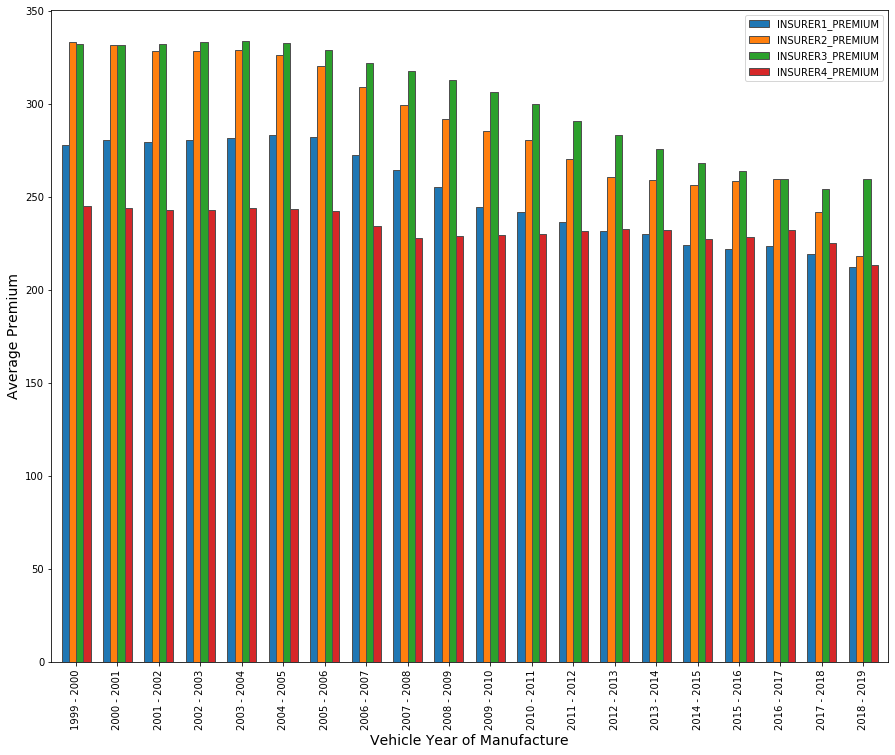

In [537]:
#Premiums by year of manufacture

source_df = data
col_name = 'MANUFYEAR'
low_val = data.MANUFYEAR.min()
high_val = data.MANUFYEAR.max()
bracket_size = 1

manuf_yr_plot = plot_df(source_df, col_name, low_val, high_val, bracket_size, insurers)
ax = manuf_yr_plot.plot.bar(figsize=(15,12), width=.7, edgecolor='#505050')
ax.set_xlabel("Vehicle Year of Manufacture", fontsize=14)
ax.set_ylabel("Average Premium", fontsize=14)

VEHAGE [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


Text(0, 0.5, 'Average Premium')

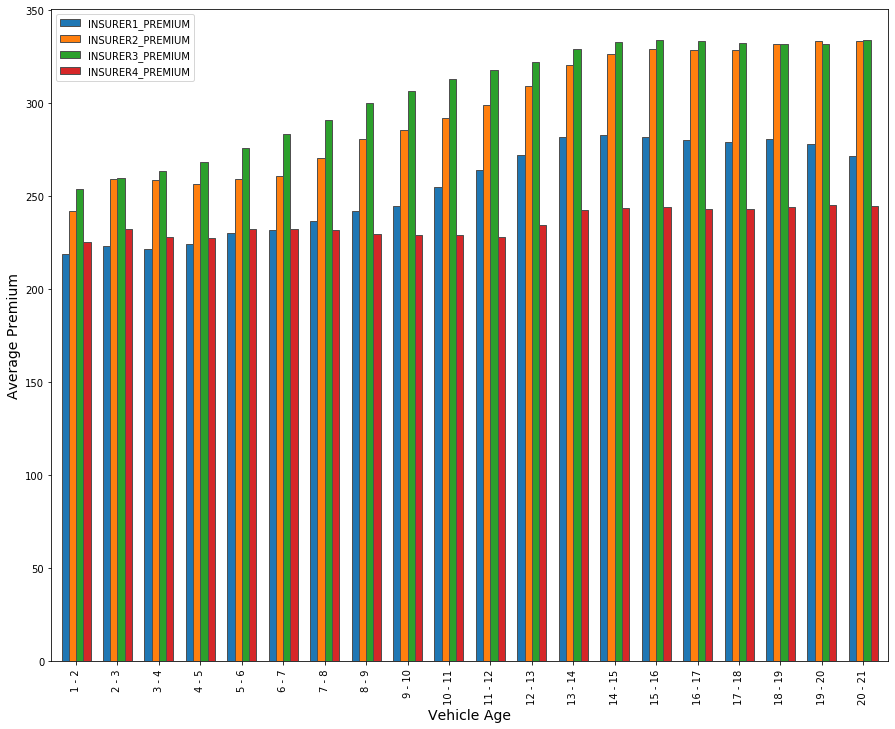

In [539]:
#Premiums by Vehicle Age

source_df = data
col_name = 'VEHAGE'
low_val = data.VEHAGE.min()
high_val = data.VEHAGE.max()
bracket_size = 1

veh_age_plot = plot_df(source_df, col_name, low_val, high_val, bracket_size, insurers)
ax = veh_age_plot.plot.bar(figsize=(15,12), width=.7, edgecolor='#505050')
ax.set_xlabel("Vehicle Age", fontsize=14)
ax.set_ylabel("Average Premium", fontsize=14)

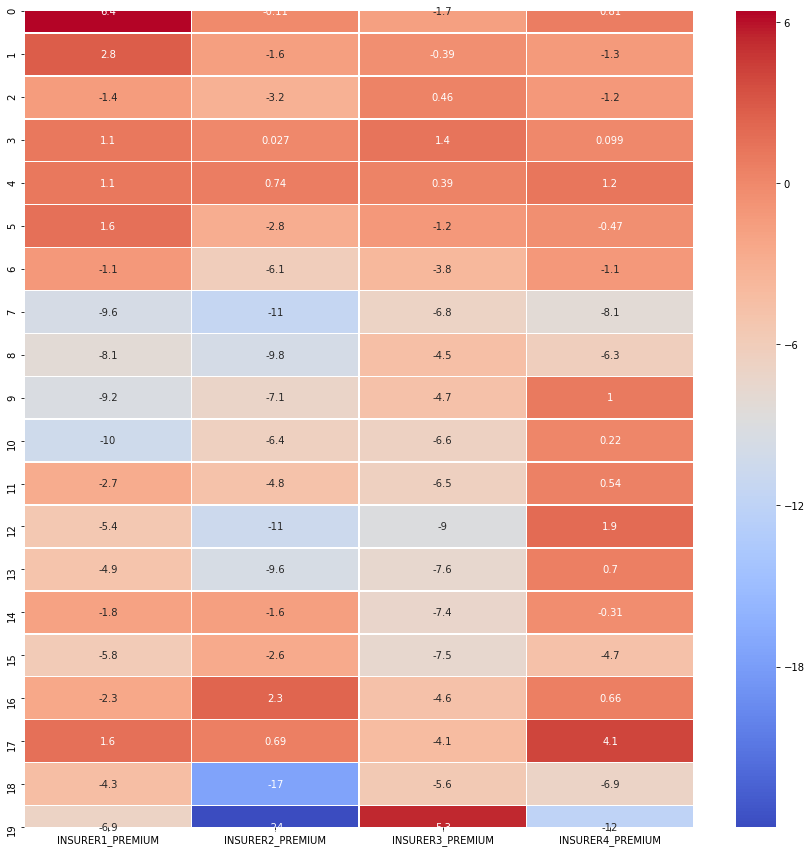

In [343]:
#make comparison table
diff_df = manuf_yr_plot.reset_index(drop=True) - veh_age_plot.iloc[::-1].reset_index(drop=True)
#plot heatmap
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(diff_df, annot=True, linewidths=.5, cmap="coolwarm", ax=ax)

In [418]:
abc = data[['MANUFYEAR', 'VEHAGE']]
abc['manu_dt'] = pd.to_datetime(data['MANUFYEAR'].astype(str), format='%Y')
abc['veh_age'] = ((pd.to_datetime('2019', format='%Y') - abc['manu_dt'])/np.timedelta64(1,'Y')).round().astype(int)
abc.head(15)

/anaconda3/envs/py3-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/envs/py3-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,MANUFYEAR,VEHAGE,manu_dt,veh_age
0,2008,11,2008-01-01,11
1,2015,4,2015-01-01,4
2,2008,11,2008-01-01,11
3,2000,19,2000-01-01,19
4,2003,16,2003-01-01,16
5,2013,6,2013-01-01,6
6,2008,11,2008-01-01,11
7,2014,5,2014-01-01,5
8,2012,7,2012-01-01,7
9,2008,11,2008-01-01,11


In [381]:
td = pd.to_datetime('now') - abc['manu_dt'][0]
print(td)
print(td.days/365)

4313 days 23:20:25.371106
11.816438356164383


In [392]:
td = pd.to_datetime('2019', format='%Y') - pd.to_datetime('2008', format='%Y')
int(td/np.timedelta64(1,'Y'))

11

YEARLYKM [ 5 10 15 20 99]


Text(0, 0.5, 'Average Premium')

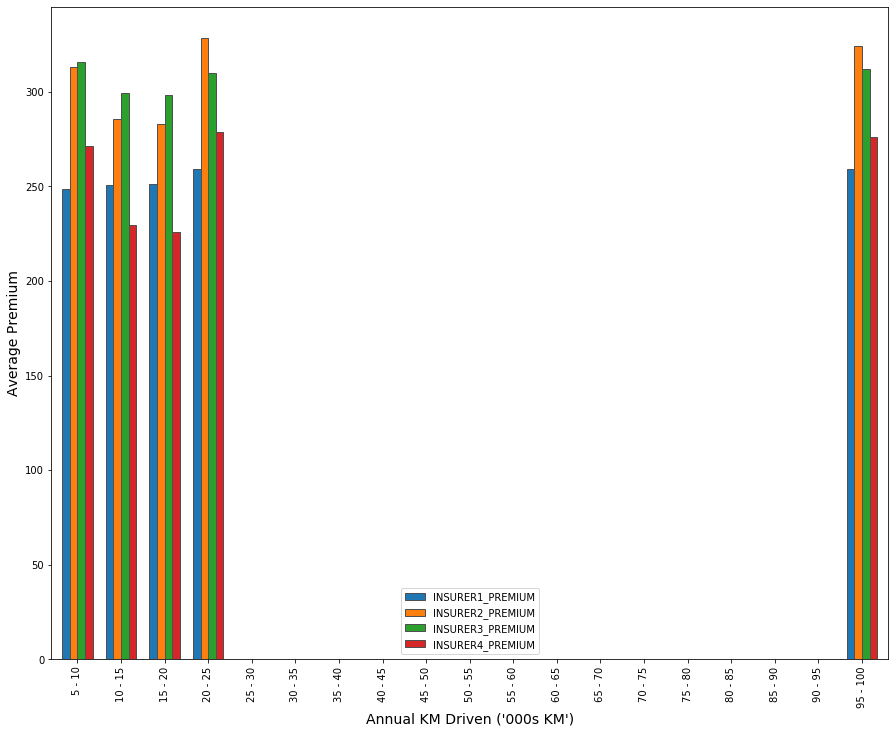

In [541]:
#Premiums by at anual KM driven
source_df = data
col_name = 'YEARLYKM'
low_val = data.YEARLYKM.min()
high_val = data.YEARLYKM.max()
bracket_size = 5

veh_age_plot = plot_df(source_df, col_name, low_val, high_val, bracket_size, insurers)
ax = veh_age_plot.plot.bar(figsize=(15,12), width=.7, edgecolor='#505050')
ax.set_xlabel("Annual KM Driven ('000s KM')", fontsize=14)
ax.set_ylabel("Average Premium", fontsize=14)

ATFAULTACCDS [0 1]


Text(0, 0.5, 'Average Premium')

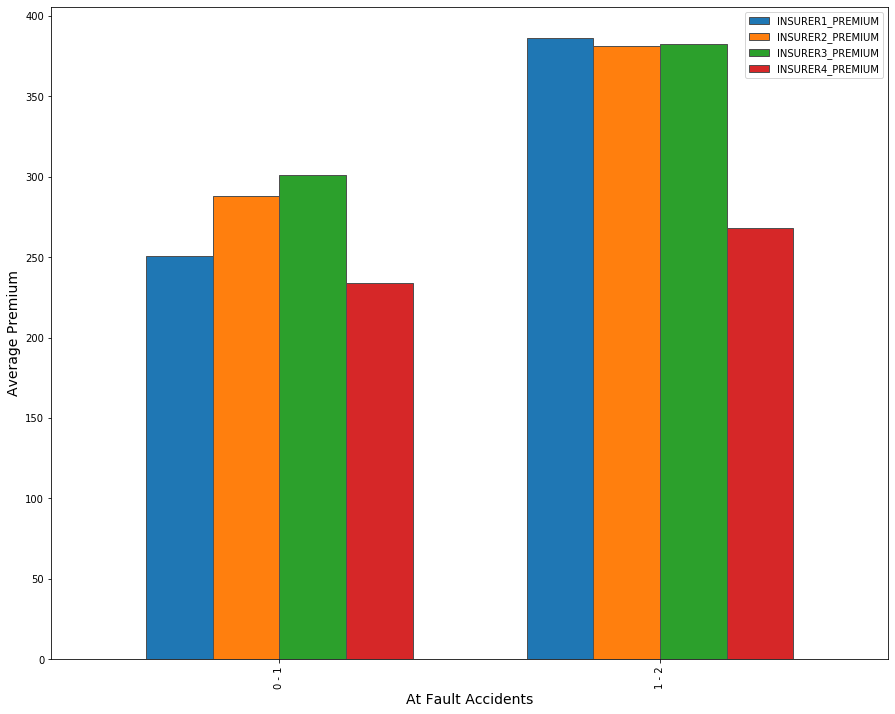

In [542]:
#Premiums by at fault accident

source_df = data
col_name = 'ATFAULTACCDS'
low_val = data.ATFAULTACCDS.min()
high_val = data.ATFAULTACCDS.max()
bracket_size = 1

veh_age_plot = plot_df(source_df, col_name, low_val, high_val, bracket_size, insurers)
ax = veh_age_plot.plot.bar(figsize=(15,12), width=.7, edgecolor='#505050')
ax.set_xlabel("At Fault Accidents ", fontsize=14)
ax.set_ylabel("Average Premium", fontsize=14)

NOYRLICOBT [0 1 2 3 4 5 6]


Text(0, 0.5, 'Average Premium')

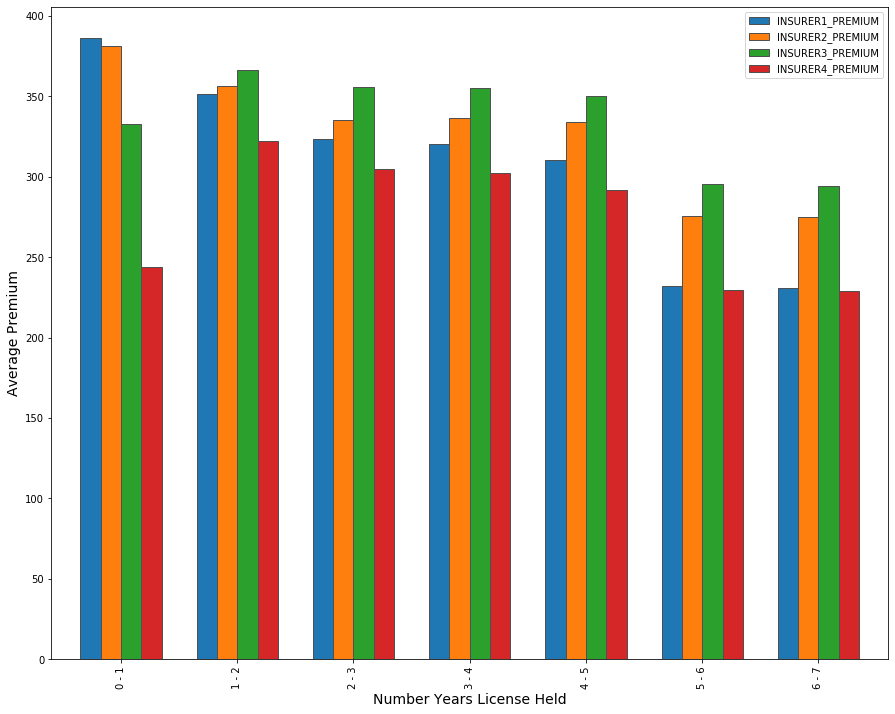

In [543]:
#Premiums by Drivers licence years

source_df = data
col_name = 'NOYRLICOBT'
low_val = data.NOYRLICOBT.min()
high_val = data.NOYRLICOBT.max()
bracket_size = 1

veh_age_plot = plot_df(source_df, col_name, low_val, high_val, bracket_size, insurers)
ax = veh_age_plot.plot.bar(figsize=(15,12), width=.7, edgecolor='#505050')
ax.set_xlabel("Number Years License Held", fontsize=14)
ax.set_ylabel("Average Premium", fontsize=14)

In [203]:
data[data['MAKE'] == 'TOYOTA'].groupby(['MAKE', 'MODEL', 'VEHAGE']).mean()[['INSURER1_PREMIUM', 'INSURER2_PREMIUM', 'INSURER3_PREMIUM','INSURER4_PREMIUM']]

INSURER1_PREMIUM  INSURER2_PREMIUM  INSURER3_PREMIUM  \
MAKE   MODEL VEHAGE                                                         
TOYOTA 86    2             246.347629        261.643459        279.483165   
             3             253.539837        316.742423        289.013545   
             4             254.559840        333.743446        325.358258   
             5             284.293866        307.677462        322.042165   
             6             244.292937        279.493401        291.054879   
...                               ...               ...               ...   
       YARIS 10            256.717491        303.919058        301.070124   
             11            254.044009        300.698218        310.510770   
             12            256.298875        304.584653        303.782761   
             13            270.935510        328.969405        303.684428   
             14            258.724974        347.749438        336.787898   

                     INSURER4_PREMIUM  
MAKE   MODEL VEHAGE                    
TOYOTA 86    2             254.723799  
             3             247.850210  
             4             300.436974  
             5             281.191297  
             6             245.787377  
...                               ...  
       YARIS 10            230.410661  
             11            238.980253  
             12            224.144524  
             13            241.787403  
             14            233.259684  

[254 rows x 4 columns]

In [ ]:
data.groupby(['MAKE']).INSURER2_PREMIUM.agg(['count', 'mean']).sort_values(by=['count'], ascending=False)

In [167]:
#show Mazdas / Used private / time period 1

d = data[(data['MAKE'] == 'MAZDA') & (data['REGUSE'] == 'PRIV') & (data['COMMENCEDATE'] == '2019-07-01 00:00:00')]
d['YEARLYKM'].unique()

array([15, 20,  5, 10, 99])

In [144]:
dtest = data.groupby(['MAKE']).INSURER2_PREMIUM.agg(['count', 'mean']).sort_values(by=['count'], ascending=False)
dtest['pct'] = (dtest['count']/(len(data)))*100
dtest['pct_cum'] = dtest['pct'].cumsum()
dtest[dtest['pct_cum'] < 96]


,count,mean,pct,pct_cum
MAKE,,,,
TOYOTA,15950,296.566420,26.804921,26.804921
MAZDA,5842,283.495332,9.817827,36.622748
HOLDEN,4410,304.426321,7.411266,44.034015
HONDA,4124,301.700635,6.930627,50.964641
HYUNDAI,3410,271.114515,5.730707,56.695348
SUBARU,3154,277.831934,5.300484,61.995832
NISSAN,2784,298.267863,4.678677,66.674509
FORD,2762,303.095150,4.641705,71.316214
VOLKSWAGEN,2582,274.482430,4.339204,75.655418


In [120]:
data.groupby(['MODEL']).mean().sort_values(by=['INSURER1_PREMIUM'])

,YEARLYKM,LICCANCNT,OWNERAGE,MVINSYEARS,MANUFYEAR,YDAGE,ATFAULTACCDS,NRMAASST,NOYRLICOBT,DEMERITPTS,NCBPCT,VEHAGE,INSURER1_PREMIUM,INSURER2_PREMIUM,INSURER3_PREMIUM,INSURER4_PREMIUM
MODEL,,,,,,,,,,,,,,,,
KALOS,15.000000,0.000000,66.333333,3.666667,2003.333333,57.666667,0.0,4.333333,6.000000,0.000000,60.0,15.666667,197.074365,304.596101,298.360650,212.330166
DUCATO,15.000000,0.000000,65.666667,1.333333,2010.666667,65.666667,0.0,0.333333,6.000000,0.000000,20.0,8.333333,197.074365,223.869598,230.347990,211.890627
535D,99.000000,0.000000,60.000000,0.000000,2017.000000,58.000000,0.0,-1.000000,6.000000,0.000000,0.0,2.000000,197.074365,195.241627,210.546649,194.324593
520I,5.000000,0.000000,57.000000,2.000000,2015.000000,57.000000,0.0,2.000000,6.000000,0.000000,0.0,4.000000,197.074365,198.077917,214.594091,194.324593
228I,15.000000,0.000000,73.000000,4.000000,2015.000000,73.000000,0.0,5.000000,6.000000,0.000000,0.0,4.000000,197.074365,195.241627,201.998750,194.324593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MUSSO,10.000000,0.000000,24.000000,0.000000,1999.000000,22.000000,0.0,-1.000000,4.000000,0.000000,0.0,20.000000,386.363985,385.880234,388.199668,385.337296
XANTIA,15.000000,0.000000,67.000000,4.000000,2000.000000,66.000000,0.0,5.000000,0.000000,0.000000,60.0,19.000000,386.363985,385.880234,272.320399,212.330166
CROSSFIRE,10.000000,0.000000,52.000000,0.000000,2004.000000,50.000000,0.0,-1.000000,6.000000,0.000000,0.0,15.000000,386.363985,385.880234,388.199668,225.469194


In [ ]:
data.groupby(['MODEL']).mean().sort_values(by=['INSURER1_PREMIUM'])

In [106]:
#print(data.MODEL.unique())

tmpdf = data.groupby(['MODEL']).mean().sort_values(by=['INSURER1_PREMIUM'])

tmpdf[['INSURER1_PREMIUM', 'INSURER2_PREMIUM', 'INSURER3_PREMIUM', 'INSURER4_PREMIUM']].tail(20)



,INSURER1_PREMIUM,INSURER2_PREMIUM,INSURER3_PREMIUM,INSURER4_PREMIUM
MODEL,,,,
SEBRING,386.363985,325.094697,328.532984,218.869333
NEON,386.363985,385.880234,388.199668,379.410046
406,386.363985,385.880234,279.562663,212.330166
C2,386.363985,385.880234,388.199668,211.132098
BLUEBIRD,386.363985,385.880234,388.199668,291.633350
RODEO,386.363985,325.675784,388.199668,253.596616
J1,386.363985,385.880234,388.199668,211.132098
LEGANZA,386.363985,385.880234,281.274970,212.330166
COUPE SX,386.363985,385.880234,388.199668,385.337296


In [ ]:
df2 = df1['diff'].to_frame()
df2.plot.bar(figsize=(12,12))

In [13]:
#format data column
data['COMMENCEDATE'] = pd.to_datetime(data['COMMENCEDATE'])

#identify time periods
print(data['COMMENCEDATE'].unique())

#create df for each time period
period1 = data[data['COMMENCEDATE'] == '2019-07-01']
period2 = data[data['COMMENCEDATE'] == '2019-09-01']

['2019-07-01T00:00:00.000000000' '2019-09-01T00:00:00.000000000']


In [579]:
#function to plot price from df

def plot_df(source_df, minage, maxage, age_bracket_size, insurers):
    plot_df = pd.DataFrame(columns=insurers)

    for i in range(minage, maxage, age_bracket_size):
        row = []
        bin = str(i) + ' - ' + str(i + age_bracket_size)

        for ins in insurers:
            row.append(source_df[(source_df['OWNERAGE'] > i) & (source_df['OWNERAGE'] < (i + age_bracket_size))][ins].mean())

        plot_df.loc[bin] = row 

    #plot thje figure    
    return plot_df
    

### Difference between 2 Time Periods (by Owner Age)

- Not super clear visually
- Difference between time periods (normalised) shows Insurer 2 changed prices between periods


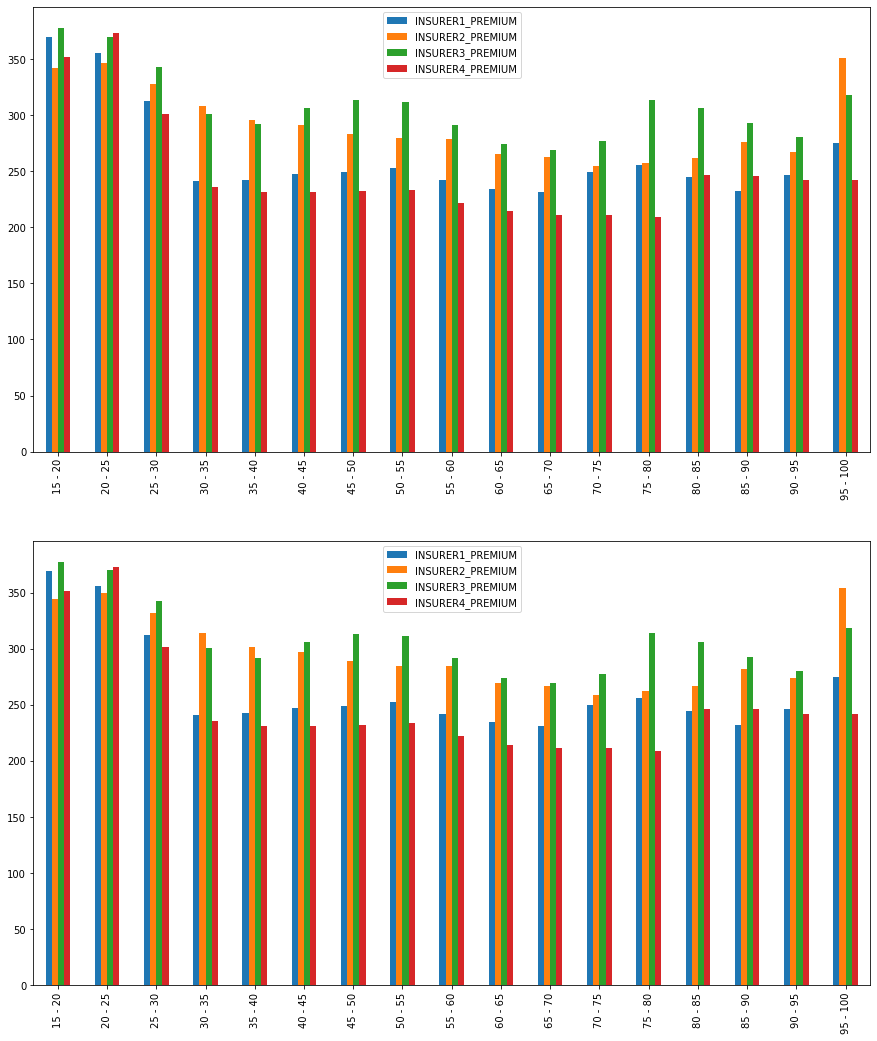

In [580]:
#plot 2 time periods
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,18))
plot_df(period1, minage, maxage, age_bracket_size, insurers).plot(ax=axes[0],kind='bar')
plot_df(period2, minage, maxage, age_bracket_size, insurers).plot(ax=axes[1],kind='bar')

In [583]:
timeperiod1 = plot_df(period1, minage, maxage, age_bracket_size, insurers)
timeperiod2 = plot_df(period2, minage, maxage, age_bracket_size, insurers)

x = timeperiod1 - timeperiod2
x = x.round(2)
#normalised data show insurer 2 changed prices between periods
(x-x.values.min())/(x.values.max()- x.values.min()).round(2)

,INSURER1_PREMIUM,INSURER2_PREMIUM,INSURER3_PREMIUM,INSURER4_PREMIUM
15 - 20,1.0,0.611635,1.0,1.0
20 - 25,1.0,0.528302,1.0,1.0
25 - 30,1.0,0.298742,1.0,1.0
30 - 35,1.0,0.113208,1.0,1.0
35 - 40,1.0,0.036164,1.0,1.0
40 - 45,1.0,0.003145,1.0,1.0
45 - 50,1.0,0.050314,1.0,1.0
50 - 55,1.0,0.213836,1.0,1.0
55 - 60,1.0,0.113208,1.0,1.0
60 - 65,1.0,0.298742,1.0,1.0


### Difference between 2 Time Periods (all tests)

- Showing price change for insurer 2
- Run over all test configurations (better because single feature may have skewed results)


In [591]:
p1_comp_df = data.copy()
p2_comp_df = data.copy()

p1_comp_df = p1_comp_df[(p1_comp_df.MVINSTYPE == "C") & (p1_comp_df.COMMENCEDATE == "2019-07-01T00:00:00.000000000")]
p2_comp_df = p2_comp_df[(p2_comp_df.MVINSTYPE == "C") & (p2_comp_df.COMMENCEDATE == "2019-09-01T00:00:00.000000000")]

print(data.shape[0])
print(p1_comp_df.shape[0])
print(p2_comp_df.shape[0])

data.shape[0] == p1_comp_df.shape[0] + p2_comp_df.shape[0]

59504
27743
27743


False

In [594]:
df = pd.DataFrame({'A': [1, 1, 2, 1, 2],
                   'B': [np.nan, 2, 3, 4, 5],
                   'C': [1, 2, 1, 1, 2]}, columns=['A', 'B', 'C'])

df

,A,B,C
0,1,NaN,1
1,1,2.0,2
2,2,3.0,1
3,1,4.0,1
4,2,5.0,2


In [595]:
df.groupby('A').mean()

,B,C
A,,
1,3.0,1.333333
2,4.0,1.500000


In [596]:
df.groupby(['A', 'B']).mean()

C
A B     
1 2.0  2
  4.0  1
2 3.0  1
  5.0  2

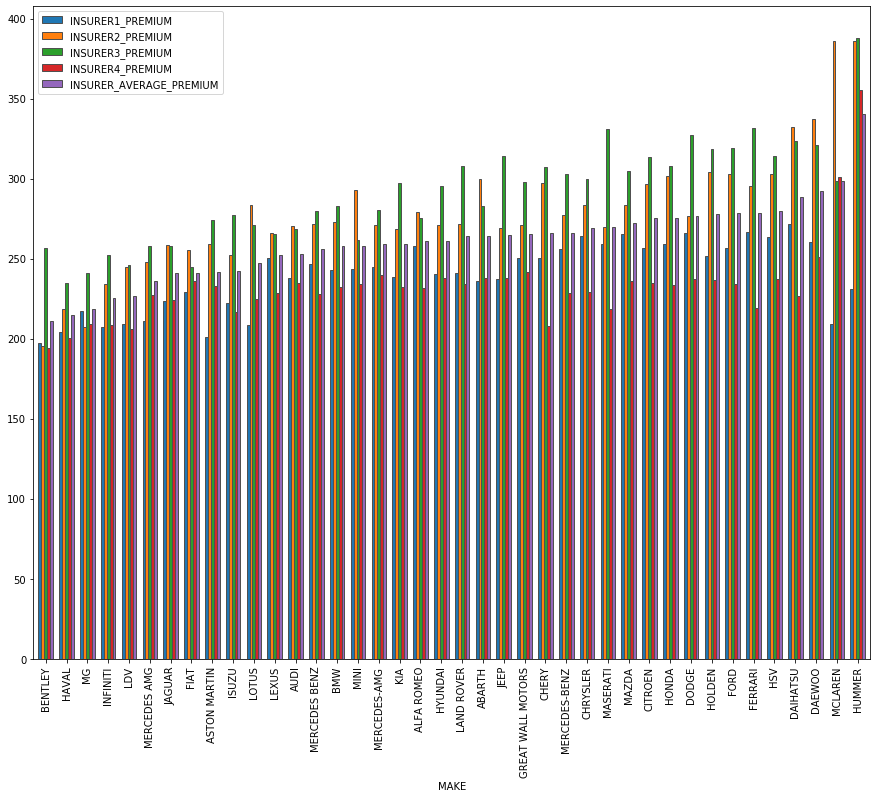

In [616]:
a_df = data.groupby('MAKE').mean().head(40)[insurers]
a_df['INSURER_AVERAGE_PREMIUM'] = a_df.loc[: , insurers].mean(axis=1)
a_df = a_df.sort_values(by=['INSURER_AVERAGE_PREMIUM'])
a_df.plot.bar(figsize=(15,12), width=.7, edgecolor='#505050')

In [592]:
data[(data.COMMENCEDATE != '2019-07-01T00:00:00.000000000') || ()]

55486

Text(0, 0.5, 'Test Configurations')

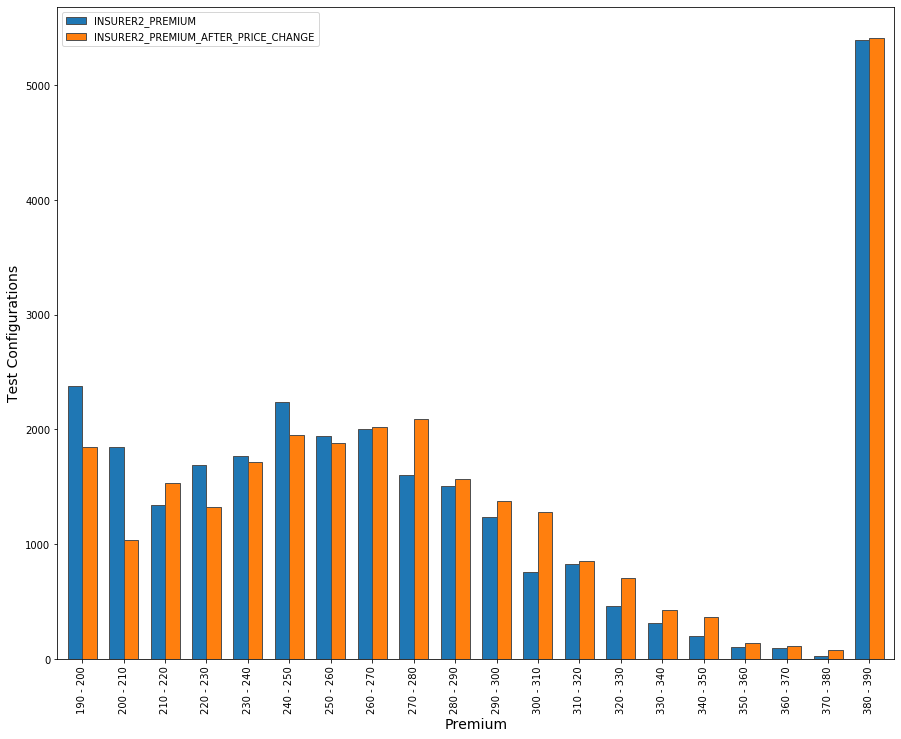

In [584]:

ndf =  plot_count_df(p1_comp_df, 190, 380, 10, insurers).copy()
ndf = ndf['INSURER2_PREMIUM'].to_frame()
ndf['INSURER2_PREMIUM_AFTER_PRICE_CHANGE'] = plot_count_df(p2_comp_df, 190, 380, 10, insurers)['INSURER2_PREMIUM']
ax = ndf.plot.bar(figsize=(15,12), width=.7, edgecolor='#505050')
ax.set_xlabel("Premium", fontsize=14)
ax.set_ylabel("Test Configurations", fontsize=14)

## ML

In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [19]:
#load the data
data = pd.read_csv('/Users/s101096/OneDrive - IAG/python/ins-test/data.csv')
results = {}

In [20]:
data.columns

Index(['YEARLYKM', 'LICCANCNT', 'OWNERAGE', 'MVINSURER', 'REGUSE', 'MAKE',
       'MVINSYEARS', 'MANUFYEAR', 'YDAGE', 'MODEL', 'ATFAULTACCDS', 'NRMAASST',
       'NOYRLICOBT', 'MVINSTYPE', 'DEMERITPTS', 'NCBPCT', 'COMREGVEH',
       'YDGENDER', 'ATFAULT5YRS', 'SHAPE', 'VEHAGE', 'INSURER1_PREMIUM',
       'INSURER2_PREMIUM', 'INSURER3_PREMIUM', 'INSURER4_PREMIUM',
       'COMMENCEDATE'],
      dtype='object')

In [21]:
#data.info()

## Linear regression

In [22]:
data.describe().columns[:-4]

Index(['YEARLYKM', 'LICCANCNT', 'OWNERAGE', 'MVINSYEARS', 'MANUFYEAR', 'YDAGE',
       'ATFAULTACCDS', 'NRMAASST', 'NOYRLICOBT', 'DEMERITPTS', 'NCBPCT',
       'VEHAGE'],
      dtype='object')

In [23]:
#Numeric Columns
numeric_cols = data.describe().columns[:-4]

# #drop 'MANUFYEAR' because it is colinear with 'VEHAGE'
numeric_cols = numeric_cols.drop('MANUFYEAR')

print(len(numeric_cols), list(numeric_cols))

11 ['YEARLYKM', 'LICCANCNT', 'OWNERAGE', 'MVINSYEARS', 'YDAGE', 'ATFAULTACCDS', 'NRMAASST', 'NOYRLICOBT', 'DEMERITPTS', 'NCBPCT', 'VEHAGE']


In [103]:
data[numeric_cols].iloc[:1 , 0:4]

,YEARLYKM,LICCANCNT,OWNERAGE,MVINSYEARS
0,15,0,68,4


In [145]:
list(data.columns)

['YEARLYKM',
 'LICCANCNT',
 'OWNERAGE',
 'MVINSURER',
 'REGUSE',
 'MAKE',
 'MVINSYEARS',
 'MANUFYEAR',
 'YDAGE',
 'MODEL',
 'ATFAULTACCDS',
 'NRMAASST',
 'NOYRLICOBT',
 'MVINSTYPE',
 'DEMERITPTS',
 'NCBPCT',
 'COMREGVEH',
 'YDGENDER',
 'ATFAULT5YRS',
 'SHAPE',
 'VEHAGE',
 'INSURER1_PREMIUM',
 'INSURER2_PREMIUM',
 'INSURER3_PREMIUM',
 'INSURER4_PREMIUM',
 'COMMENCEDATE']

In [161]:
y = data['INSURER1_PREMIUM']
result_df = pd.DataFrame(columns=['Features', 'Column Count', 'R2'])

for j in range(1, 7):
    ncols = j
    for i in range(len(data[numeric_cols].columns)-(ncols-1)):
        #print(data[numeric_cols].iloc[:1 , i:i+(ncols)])
        X = data[numeric_cols].iloc[: , i:i+(ncols)]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

        reg = LinearRegression().fit(X_train, y_train)

        y_pred = reg.predict(X_test)

        result_df.loc[len(result_df)] = [list(data[numeric_cols].iloc[:1 , i:i+(ncols)].columns), len(list(data[numeric_cols].iloc[:1 , i:i+(ncols)].columns)), reg.score(X_test, y_test)]


In [162]:
result_df.sort_values(by=['Column Count', 'R2'], ascending=[False, False])

,Features,Column Count,R2
50,"[ATFAULTACCDS, NRMAASST, NOYRLICOBT, DEMERITPT...",6,0.640763
47,"[OWNERAGE, MVINSYEARS, YDAGE, ATFAULTACCDS, NR...",6,0.636385
48,"[MVINSYEARS, YDAGE, ATFAULTACCDS, NRMAASST, NO...",6,0.636328
49,"[YDAGE, ATFAULTACCDS, NRMAASST, NOYRLICOBT, DE...",6,0.635830
46,"[LICCANCNT, OWNERAGE, MVINSYEARS, YDAGE, ATFAU...",6,0.180092
45,"[YEARLYKM, LICCANCNT, OWNERAGE, MVINSYEARS, YD...",6,0.179929
41,"[MVINSYEARS, YDAGE, ATFAULTACCDS, NRMAASST, NO...",5,0.635861
42,"[YDAGE, ATFAULTACCDS, NRMAASST, NOYRLICOBT, DE...",5,0.635800
43,"[ATFAULTACCDS, NRMAASST, NOYRLICOBT, DEMERITPT...",5,0.609159
44,"[NRMAASST, NOYRLICOBT, DEMERITPTS, NCBPCT, VEH...",5,0.564855


In [164]:
result_df.sort_values(by=['R2'], ascending=[False])

,Features,Column Count,R2
50,"[ATFAULTACCDS, NRMAASST, NOYRLICOBT, DEMERITPT...",6,0.640763
47,"[OWNERAGE, MVINSYEARS, YDAGE, ATFAULTACCDS, NR...",6,0.636385
48,"[MVINSYEARS, YDAGE, ATFAULTACCDS, NRMAASST, NO...",6,0.636328
41,"[MVINSYEARS, YDAGE, ATFAULTACCDS, NRMAASST, NO...",5,0.635861
49,"[YDAGE, ATFAULTACCDS, NRMAASST, NOYRLICOBT, DE...",6,0.635830
42,"[YDAGE, ATFAULTACCDS, NRMAASST, NOYRLICOBT, DE...",5,0.635800
34,"[YDAGE, ATFAULTACCDS, NRMAASST, NOYRLICOBT]",4,0.635277
43,"[ATFAULTACCDS, NRMAASST, NOYRLICOBT, DEMERITPT...",5,0.609159
35,"[ATFAULTACCDS, NRMAASST, NOYRLICOBT, DEMERITPTS]",4,0.608131
26,"[ATFAULTACCDS, NRMAASST, NOYRLICOBT]",3,0.606745


In [153]:
result_df.loc[17]['Features']

['NRMAASST', 'NOYRLICOBT']

In [66]:
X = data[numeric_cols]
y = data['INSURER1_PREMIUM']


result_df = pd.DataFrame(columns=['Features', 'R2'])

for col in X.columns:
    X = data[[col]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    reg = LinearRegression().fit(X_train, y_train)

    y_pred = reg.predict(X_test)
        
    result_df.loc[len(result_df)] = [[col], reg.score(X_test, y_test)]


result_df.sort_values(by=['', 'R2'], ascending=False)

,Features,R2
7,[NOYRLICOBT],0.534597
10,[VEHAGE],0.105061
5,[ATFAULTACCDS],0.078721
4,[YDAGE],0.078519
2,[OWNERAGE],0.025124
1,[LICCANCNT],0.018339
9,[NCBPCT],0.013624
3,[MVINSYEARS],0.013281
6,[NRMAASST],0.012259
0,[YEARLYKM],0.000612


In [56]:
result_df.loc[0] = [1,1]
result_df

,Feature,R2
1,1,1
0,1,1


In [24]:
split_point = 50000

insurer = 'INSURER1_PREMIUM'

#Insurer 1 Target Vector
y_train = data[insurer][:split_point]
y_test = data[insurer][split_point:]

res_df = pd.DataFrame(columns=['Dropped Column', 'R2', 'MAE', 'MSE', 'RMSE'])

#number of columns to select
n = 11

#Select a subset of n columns

#Drop column
for dropcol in numeric_cols:
    X_train = data[numeric_cols[:n]][:split_point]
    X_test = data[numeric_cols[:n]][split_point:]
    #print(dropcol)
    
    X_train = X_train.drop(columns=[dropcol])
    X_test = X_test.drop(columns=[dropcol])

    reg = LinearRegression().fit(X_train, y_train)

    y_pred = reg.predict(X_test)
    y_pred

    res_df.loc[len(res_df)] = [dropcol, 
                               reg.score(X_test, y_test),
                               metrics.mean_absolute_error(y_test, y_pred), 
                               metrics.mean_squared_error(y_test, y_pred), 
                               np.sqrt(metrics.mean_squared_error(y_test, y_pred))]
    
res_df.sort_values(by='RMSE', ascending=False)

,Dropped Column,R2,MAE,MSE,RMSE
7,NOYRLICOBT,0.323407,41.480305,3012.225345,54.883744
5,ATFAULTACCDS,0.608102,27.901344,1744.747341,41.770173
10,VEHAGE,0.637148,27.884265,1615.434215,40.192465
4,YDAGE,0.659988,25.725596,1513.748381,38.906919
1,LICCANCNT,0.670241,25.729629,1468.102907,38.315831
3,MVINSYEARS,0.675372,25.442868,1445.258518,38.016556
9,NCBPCT,0.675917,25.487574,1442.832754,37.984638
0,YEARLYKM,0.676093,25.472520,1442.047563,37.974301
2,OWNERAGE,0.676215,25.478066,1441.504813,37.967154
6,NRMAASST,0.676317,25.487424,1441.053084,37.961205


In [25]:
#Rank feature importance by RMSE value
feat = list(res_df.sort_values(by='RMSE', ascending=False)['Dropped Column'])
print(feat)

['NOYRLICOBT', 'ATFAULTACCDS', 'VEHAGE', 'YDAGE', 'LICCANCNT', 'MVINSYEARS', 'NCBPCT', 'YEARLYKM', 'OWNERAGE', 'NRMAASST', 'DEMERITPTS']


In [26]:
#print(len(data))
split_point = 59000

#Show effect on R2 & RMSE of progressively adding the remaining features
for i in range(1, len(feat)):
    cols = feat[:i]
    
    #Feature Matrices
    X_train = data[cols][:split_point]
    X_test = data[cols][split_point:]
    
    #Target Vectors
    y_train = data[insurer][:split_point]
    y_test = data[insurer][split_point:]

    #Fit the model
    reg = LinearRegression().fit(X_train, y_train)

    #Predict premuims
    y_pred = reg.predict(X_test)

    #Show which features were ised in each interation
    print(cols)
    #print R2 and RMSE
    print(reg.score(X_test, y_test), np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

['NOYRLICOBT']
0.45641365855592075 45.49133785641392
['NOYRLICOBT', 'ATFAULTACCDS']
0.5737279791473389 40.28448864326941
['NOYRLICOBT', 'ATFAULTACCDS', 'VEHAGE']
0.610192556895524 38.52294716164034
['NOYRLICOBT', 'ATFAULTACCDS', 'VEHAGE', 'YDAGE']
0.6524645801186416 36.37424418624803
['NOYRLICOBT', 'ATFAULTACCDS', 'VEHAGE', 'YDAGE', 'LICCANCNT']
0.6529582778322485 36.34839895969953
['NOYRLICOBT', 'ATFAULTACCDS', 'VEHAGE', 'YDAGE', 'LICCANCNT', 'MVINSYEARS']
0.6562309056782636 36.17660902337693
['NOYRLICOBT', 'ATFAULTACCDS', 'VEHAGE', 'YDAGE', 'LICCANCNT', 'MVINSYEARS', 'NCBPCT']
0.6565048980615278 36.16218932811404
['NOYRLICOBT', 'ATFAULTACCDS', 'VEHAGE', 'YDAGE', 'LICCANCNT', 'MVINSYEARS', 'NCBPCT', 'YEARLYKM']
0.6554092176671849 36.21981846928156
['NOYRLICOBT', 'ATFAULTACCDS', 'VEHAGE', 'YDAGE', 'LICCANCNT', 'MVINSYEARS', 'NCBPCT', 'YEARLYKM', 'OWNERAGE']
0.6581765982270334 36.07408607938111
['NOYRLICOBT', 'ATFAULTACCDS', 'VEHAGE', 'YDAGE', 'LICCANCNT', 'MVINSYEARS', 'NCBPCT', 'YEARL

### Linear regression with categoric columns converted to numeric

In [373]:
# Assess difference between the 2 data capture periods
data['COMMENCEDATE'].unique()

array(['2019-07-01', '2019-09-01'], dtype=object)

In [346]:
converted_data = data.copy()

# #split out period 1
# converted_data = converted_data[converted_data['COMMENCEDATE'] == '2019-09-01']
# converted_data.drop(columns=['COMMENCEDATE'], inplace=True)

#print(converted_data['COMMENCEDATE'].unique())

#CONVERT COMMENCEDATE column with OHE
#Alternative aproach (splitting the data by capture date is commented out above
COMMENCEDATE_df = pd.get_dummies(converted_data['COMMENCEDATE'], prefix='COMMENCEDATE', drop_first=True)

#Add OHE columns
converted_data = pd.concat([converted_data, COMMENCEDATE_df], axis=1)

#Drop source column
converted_data.drop(['COMMENCEDATE'],axis=1, inplace=True)



#CONVERT YDGENDER column with OHE
gender_df = pd.get_dummies(converted_data['YDGENDER'], prefix='gender', drop_first=True)

#Add OHE columns
converted_data = pd.concat([converted_data, gender_df], axis=1)

#Drop source column
converted_data.drop(['YDGENDER'],axis=1, inplace=True)



#CONVERT MVINSTYPE column with OHE
MVINSTYPE_df = pd.get_dummies(converted_data['MVINSTYPE'], prefix='MVINSTYPE', drop_first=True)

#Add OHE columns
converted_data = pd.concat([converted_data, MVINSTYPE_df], axis=1)

#Drop source column
converted_data.drop(['MVINSTYPE'],axis=1, inplace=True)



#print(converted_data['SHAPE'].unique())
#CONVERT SHAPE column with OHE
SHAPE_df = pd.get_dummies(converted_data['SHAPE'], prefix='SHAPE', drop_first=True)

#Add OHE columns
converted_data = pd.concat([converted_data, SHAPE_df], axis=1)

#Drop source column
converted_data.drop(['SHAPE'],axis=1, inplace=True)


#Convert STR to INT
converted_data['REGUSE'].replace(['PRIV', 'BUSG'], [0,1], inplace=True)
converted_data['ATFAULT5YRS'].replace(['N', 'Y'], [0,1], inplace=True)
converted_data['COMREGVEH'].replace(['N', 'Y'], [0,1], inplace=True)

#converted_data.head().T

In [347]:
#Reorder cols to put targets at end
#Drop ['MVINSURER', 'MAKE', 'MODEL'] columns (for now)
#need to comment out COMMENCEDATE row when splitting by capture date

cols = ['YEARLYKM',
 'LICCANCNT',
 'OWNERAGE',
 'REGUSE',
 'MVINSYEARS',
 'MANUFYEAR',
 'YDAGE',
 'ATFAULTACCDS',
 'NRMAASST',
 'NOYRLICOBT',
 'DEMERITPTS',
 'NCBPCT',
 'COMREGVEH',
 'ATFAULT5YRS',
 'VEHAGE',
 'gender_M',
 'gender_U',
 'MVINSTYPE_N',
 'MVINSTYPE_T',
 'COMMENCEDATE_2019-09-01',
 'SHAPE_PVF',
 'SHAPE_SED',
 'SHAPE_WAG',
 'INSURER1_PREMIUM',
 'INSURER2_PREMIUM',
 'INSURER3_PREMIUM',
 'INSURER4_PREMIUM']

In [348]:
#reorder cols to leave target columns on RHS
converted_data = converted_data[cols]

#Train / Test Split
split_point = int(len(converted_data) * 0.8)

insurers = ['INSURER1_PREMIUM', 'INSURER2_PREMIUM', 'INSURER3_PREMIUM', 'INSURER4_PREMIUM']

#Training data is main df minus target columns
X_train = converted_data.iloc[:split_point, :-4]
X_test = converted_data.iloc[split_point:, :-4]

for insurer in insurers:

    #Use INS as target variable
    y_train = converted_data[insurer][:split_point]
    y_test = converted_data[insurer][split_point:]
    
    #Train the model
    reg = LinearRegression().fit(X_train, y_train)

    y_pred = reg.predict(X_test)

    print(reg.score(X_test, y_test), 
          metrics.mean_absolute_error(y_test, y_pred), 
          metrics.mean_squared_error(y_test, y_pred), 
          np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.7467331908282459 22.70216883579135 1114.254659741737 33.38045325848253
0.7061211002200303 25.278622821429746 1208.1360121357511 34.75825099362382
0.640571031908625 24.10205930399918 980.3293230555292 31.31021116274257
0.5009677162511063 24.826320458895303 1397.9216611366337 37.38879058135785


In [374]:
print("numeric columns only")
print((36.027973810934235 + 35.74674838788864 + 31.92466504307356 + 35.23380959992721)/ 4)
print("Converted data P1")
print((33.30098069159664+36.03636257824636+31.700061541707296+ 38.579978547727684)/4)
print("Converted data P2")
print((33.48262880989007+ 34.67898665980928+31.291338509701358+ 37.59139108955968)/4)
print("Converted data P1 & 2")
print((33.38045325848253+34.75825099362382+ 31.31021116274257+ 37.38879058135785)/4)

numeric columns only
34.73329921045591
Converted data P1
34.9043458398195
Converted data P2
34.2610862672401
Converted data P1 & 2
34.209426499051695


In [ ]:
"""
Unconverted result - Ins1
['NOYRLICOBT', 'ATFAULTACCDS', 'VEHAGE', 'YDAGE', 'LICCANCNT', 'MVINSYEARS', 'NCBPCT', 'YEARLYKM', 'OWNERAGE', 'NRMAASST']
0.6590499219894506 36.027973810934235

Unconverted result - Ins2
['VEHAGE', 'NOYRLICOBT', 'DEMERITPTS', 'YDAGE', 'ATFAULTACCDS', 'NCBPCT', 'LICCANCNT', 'YEARLYKM', 'MVINSYEARS', 'OWNERAGE']
0.6886926576015242 35.74674838788864

Unconverted result - Ins3
['VEHAGE', 'YDAGE', 'MVINSYEARS', 'ATFAULTACCDS', 'DEMERITPTS', 'NOYRLICOBT', 'OWNERAGE', 'NCBPCT', 'NRMAASST', 'YEARLYKM']
0.6408123452462595 31.92466504307356

Unconverted result - Ins4
['DEMERITPTS', 'VEHAGE', 'YDAGE', 'NCBPCT', 'NOYRLICOBT', 'OWNERAGE', 'ATFAULTACCDS', 'MVINSYEARS', 'LICCANCNT', 'NRMAASST']
0.5399772132011205 35.23380959992721


Period 1 Results

0.7552364742130215 22.822375358241064 1108.9553150220922 33.30098069159664
0.7122075655014874 26.277277235826602 1298.619427870835 36.03636257824636
0.6304426612797658 24.421774393378804 1004.89390174803 31.700061541707296
0.48255710375363015 25.588826036564974 1488.4147447431283 38.579978547727684

Period 2 Results
0.7455771961858166 22.694822989783965 1121.086432020881 33.48262880989007
0.7068635377710489 25.20197057351196 1202.63211575123 34.67898665980928
0.6401352087865018 24.10437444165228 979.1478657287191 31.291338509701358
0.5092597167879074 25.024231560161706 1413.112684048227 37.59139108955968

Both periods
0.7467331908282459 22.70216883579135 1114.254659741737 33.38045325848253
0.7061211002200303 25.278622821429746 1208.1360121357511 34.75825099362382
0.640571031908625 24.10205930399918 980.3293230555292 31.31021116274257
0.5009677162511063 24.826320458895303 1397.9216611366337 37.38879058135785

Normalised cols - Both Periods
0.6726806504053789 25.461803535113546 1440.050955362675 37.948003311935594
0.6769632458588877 26.10359939173062 1328.0039370418278 36.44178833484751
0.6022443011279279 25.114926395108107 1084.864075055876 32.93727485776375
0.49302529556112806 25.328444553313936 1420.170486084334 37.685149410402154

XXX

"""

In [407]:
#Data Dictionary 
ddict = pd.read_csv('/Users/s101096/OneDrive - IAG/python/ins-test/DataDictionary.csv')
ddict

,FIELD,DESCRIPTION
0,YEARLYKM,Average Annual Kilometres
1,LICCANCNT,Conviction or Suspension in last 5 years
2,OWNERAGE,Age of Owner
3,MVINSURER,"Other Insurance Provider (If MVINSTYPE = N, th..."
4,REGUSE,Registration Use Type
5,MAKE,Vehicle Manufacturer
6,MVINSYEARS,Years Insured with Other Insurance
7,MANUFYEAR,Year of Manufacture
8,YDAGE Age,Youngest Driver
9,MODEL,Vehicle Model


In [405]:
converted_data = data.copy()
converted_data[converted_data['MVINSTYPE'] == 'C']
#Convert STR to INT
converted_data['ATFAULT5YRS'].replace(['N', 'Y'], [0,1], inplace=True)

removed_cols = ['MVINSURER', 'REGUSE', 'MAKE', 'MODEL', 'MANUFYEAR', 
                'MVINSTYPE', 'COMREGVEH', 'YDGENDER', 'SHAPE']

cols = ['YEARLYKM', 'LICCANCNT', 'OWNERAGE','MVINSYEARS', 
        'YDAGE', 'ATFAULTACCDS', 'NRMAASST','NOYRLICOBT', 
        'DEMERITPTS', 'NCBPCT', 'ATFAULT5YRS', 'VEHAGE', 
        'INSURER1_PREMIUM', 'INSURER2_PREMIUM', 'INSURER3_PREMIUM', 'INSURER4_PREMIUM']

#reorder cols to leave target columns on RHS
converted_data = converted_data[cols]

#converted_data.head(2).T

In [406]:
#Train / Test Split
split_point = int(len(converted_data) * 0.8)

insurers = ['INSURER1_PREMIUM', 'INSURER2_PREMIUM', 'INSURER3_PREMIUM', 'INSURER4_PREMIUM']

#Training data is main df minus target columns
X_train = converted_data.iloc[:split_point, :-4]
X_test = converted_data.iloc[split_point:, :-4]

for insurer in insurers:

    #Use INS as target variable
    y_train = converted_data[insurer][:split_point]
    y_test = converted_data[insurer][split_point:]
    
    #Train the model
    reg = LinearRegression().fit(X_train, y_train)

    y_pred = reg.predict(X_test)

    print(reg.score(X_test, y_test), 
          metrics.mean_absolute_error(y_test, y_pred), 
          metrics.mean_squared_error(y_test, y_pred), 
          np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.6726806504053789 25.461803535113518 1440.050955362675 37.948003311935594
0.6769632458588876 26.103599391730604 1328.003937041828 36.44178833484751
0.6022443011279279 25.11492639510809 1084.864075055876 32.93727485776375
0.49302529556112784 25.328444553313936 1420.1704860843347 37.68514941040217


In [410]:
converted_data.head(2).T

,0,1
YEARLYKM,15.000000,20.000000
LICCANCNT,0.000000,0.000000
OWNERAGE,68.000000,31.000000
MVINSYEARS,4.000000,0.000000
YDAGE,68.000000,31.000000
ATFAULTACCDS,0.000000,0.000000
NRMAASST,5.000000,-1.000000
NOYRLICOBT,6.000000,6.000000
DEMERITPTS,0.000000,2.000000
NCBPCT,60.000000,0.000000


In [409]:
pd.get_dummies(data['SHAPE'], prefix='SHAPE', drop_first=True)


,SHAPE_PVF,SHAPE_SED,SHAPE_WAG
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
59499,0,1,0
59500,0,1,0
59501,0,1,0
59502,0,0,1


# Encoding remaining categorical data
# Feature selection
# Binning some features

In [444]:
#Normalise the data before regression
norm_df = (converted_data - converted_data.min())/(converted_data.max() - converted_data.min())

#Un-normalise the target variables
norm_df[insurers] = data[insurers]

norm_df

,YEARLYKM,LICCANCNT,OWNERAGE,MVINSYEARS,YDAGE,ATFAULTACCDS,NRMAASST,NOYRLICOBT,DEMERITPTS,NCBPCT,ATFAULT5YRS,VEHAGE,INSURER1_PREMIUM,INSURER2_PREMIUM,INSURER3_PREMIUM,INSURER4_PREMIUM
0,0.106383,0.0,0.621951,1.00,0.822581,0.0,0.230769,1.0,0.000000,1.0,0.0,0.526316,197.074365,234.433298,254.370880,198.825231
1,0.159574,0.0,0.170732,0.00,0.225806,0.0,0.000000,1.0,0.142857,0.0,0.0,0.157895,209.265121,386.581143,283.154906,300.851102
2,0.000000,0.0,0.512195,0.25,0.677419,0.0,0.076923,1.0,0.500000,0.0,0.0,0.526316,197.074365,386.581143,309.217925,334.590919
3,0.106383,0.0,0.512195,1.00,0.258065,0.0,0.230769,0.0,0.000000,1.0,0.0,0.947368,386.363985,386.581143,310.576164,212.330166
4,0.106383,0.0,0.609756,1.00,0.806452,0.0,0.153846,1.0,0.000000,1.0,0.0,0.789474,197.074365,266.572993,293.058045,212.330166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59499,0.106383,0.0,0.475610,0.75,0.629032,0.0,0.153846,1.0,0.000000,1.0,0.0,0.315789,197.074365,215.522536,259.216210,198.825231
59500,0.106383,0.0,0.646341,1.00,0.854839,0.0,0.230769,1.0,0.000000,1.0,0.0,0.157895,197.074365,203.622082,206.251886,194.324593
59501,0.053191,0.0,0.646341,0.00,0.854839,0.0,0.000000,1.0,0.285714,0.0,0.0,0.052632,197.074365,385.179325,201.998750,283.323313
59502,0.106383,0.0,0.268293,0.00,0.354839,0.0,0.000000,1.0,0.000000,1.0,0.0,0.052632,209.265121,247.851962,256.122509,206.341572


best train result
    estimators  min_leaf  train result  test result
40        45.0       1.0      0.964073     0.942912


In [489]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

results = pd.DataFrame(columns=['estimators', 'min_leaf', 'train result', 'test result'])

#Test with just Numeric Columns
numeric_cols = data.describe().columns #[:-4]
numeric_cols = numeric_cols.drop('MANUFYEAR')
norm_df = data[numeric_cols]

split_point = int(len(norm_df) * 0.8)

#Training data is main df minus target columns
X_train = norm_df.iloc[:split_point, :-4]
X_test = norm_df.iloc[split_point:, :-4]

#Use INS as target variable
y_train = norm_df['INSURER1_PREMIUM'][:split_point]
y_test = norm_df['INSURER1_PREMIUM'][split_point:]

for i in range(5, 101, 10):
    for j in range(1, 6, 2):
        model = RandomForestRegressor(n_estimators=i, min_samples_leaf=j, n_jobs=-1, random_state=1) #, max_features=0.5, oob_score=True)
        model.fit(X_train, y_train)
        print("{} estimators, {} min leaf ".format(i, j), 'Built model - score ', r2_score(model.predict(X_train), y_train), r2_score(model.predict(X_test), y_test))
        results.loc[len(results)] = [i, j, r2_score(model.predict(X_train), y_train), r2_score(model.predict(X_test), y_test)]


print('best train result')
print(results[results['train result'] == results['train result'].max()])        
print('best test result')
print(results[results['test result'] == results['test result'].max()])   

results.sort_values(by=['train result'], ascending=False)

5 estimators, 1 min leaf  Built model - score  0.9583628776401332 0.9314293379375738
5 estimators, 3 min leaf  Built model - score  0.9276562165557207 0.8949366843127231
5 estimators, 5 min leaf  Built model - score  0.9116290658242955 0.8845571927821874
15 estimators, 1 min leaf  Built model - score  0.962240232532464 0.938887436219472
15 estimators, 3 min leaf  Built model - score  0.932067546622311 0.9013557681139179
15 estimators, 5 min leaf  Built model - score  0.915098925298576 0.8892692759707878
25 estimators, 1 min leaf  Built model - score  0.9632756830841499 0.9410365438390303
25 estimators, 3 min leaf  Built model - score  0.9329297614400062 0.9030257264330847
25 estimators, 5 min leaf  Built model - score  0.9158237217606493 0.8900687923407881
35 estimators, 1 min leaf  Built model - score  0.9636147679537908 0.9415357499396354
35 estimators, 3 min leaf  Built model - score  0.93336135993845 0.9033284250456547
35 estimators, 5 min leaf  Built model - score  0.9161079738557

,estimators,min_leaf,train result,test result
27,95.0,1.0,0.964208,0.942845
24,85.0,1.0,0.964166,0.942750
21,75.0,1.0,0.964138,0.942651
18,65.0,1.0,0.964066,0.942621
15,55.0,1.0,0.963970,0.942460
12,45.0,1.0,0.963872,0.942219
9,35.0,1.0,0.963615,0.941536
6,25.0,1.0,0.963276,0.941037
3,15.0,1.0,0.962240,0.938887
0,5.0,1.0,0.958363,0.931429


## Normalising the data

In [421]:
#Normalise the data before regression
norm_df = (converted_data - converted_data.min())/(converted_data.max() - converted_data.min())
#norm_df.head(2).T

#Un-normalise the target variables
norm_df[insurers] = data[insurers]

#Train / Test Split
split_point = int(len(norm_df) * 0.8)

insurers = ['INSURER1_PREMIUM', 'INSURER2_PREMIUM', 'INSURER3_PREMIUM', 'INSURER4_PREMIUM']

#Training data is main df minus target columns
X_train = norm_df.iloc[:split_point, :-4]
X_test = norm_df.iloc[split_point:, :-4]

for insurer in insurers:

    #Use INS as target variable
    y_train = norm_df[insurer][:split_point]
    y_test = norm_df[insurer][split_point:]
    
    #Train the model
    reg = LinearRegression().fit(X_train, y_train)

    y_pred = reg.predict(X_test)

    print(reg.score(X_test, y_test), 
          metrics.mean_absolute_error(y_test, y_pred), 
          metrics.mean_squared_error(y_test, y_pred), 
          np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.6726806504053789 25.461803535113546 1440.050955362675 37.948003311935594
0.6769632458588877 26.10359939173062 1328.0039370418278 36.44178833484751
0.6022443011279279 25.114926395108107 1084.864075055876 32.93727485776375
0.49302529556112806 25.328444553313936 1420.170486084334 37.685149410402154


In [ ]:
data